# Exploratory data analysis
> The easy way

In [1]:
#installing the library
! pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 50.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import sweetviz as sv
import IPython

In [3]:
data = pd.read_csv('../input/tabular-playground-series-aug-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-aug-2022/test.csv')

In [4]:
data.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure'],
      dtype='object')

## Creating a quick and interactive EDA dashboard on the data

[Fast & powerful EDA in notebooks using Sweetviz 2.0 - Colaboratory](https://colab.research.google.com/drive/1-md6YEwcVGWVnQWTBirQSYQYgdNoeSWg?usp=sharing#scrollTo=XdxySa-7QxJS)

Both Notebook and HTML reports can use a vertical or widescreen layout. The same information is displayed, but in the vertical layout users must click on a specific feature to see the detail, whereas in widescreen mode, data is displayed as soon as the mouse goes over any feature and this view can be locked-in by clicking. I will go for vertical layout

                                             |          | [  0%]   00:00 -> (? left)


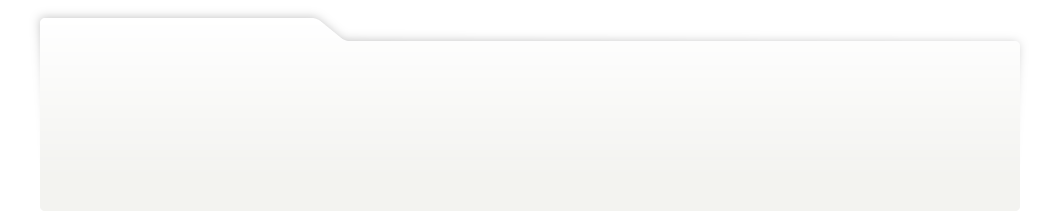
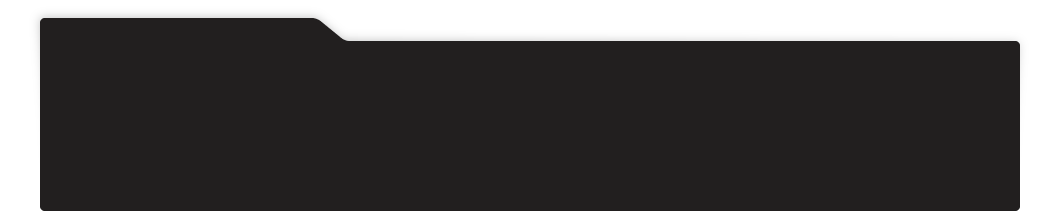
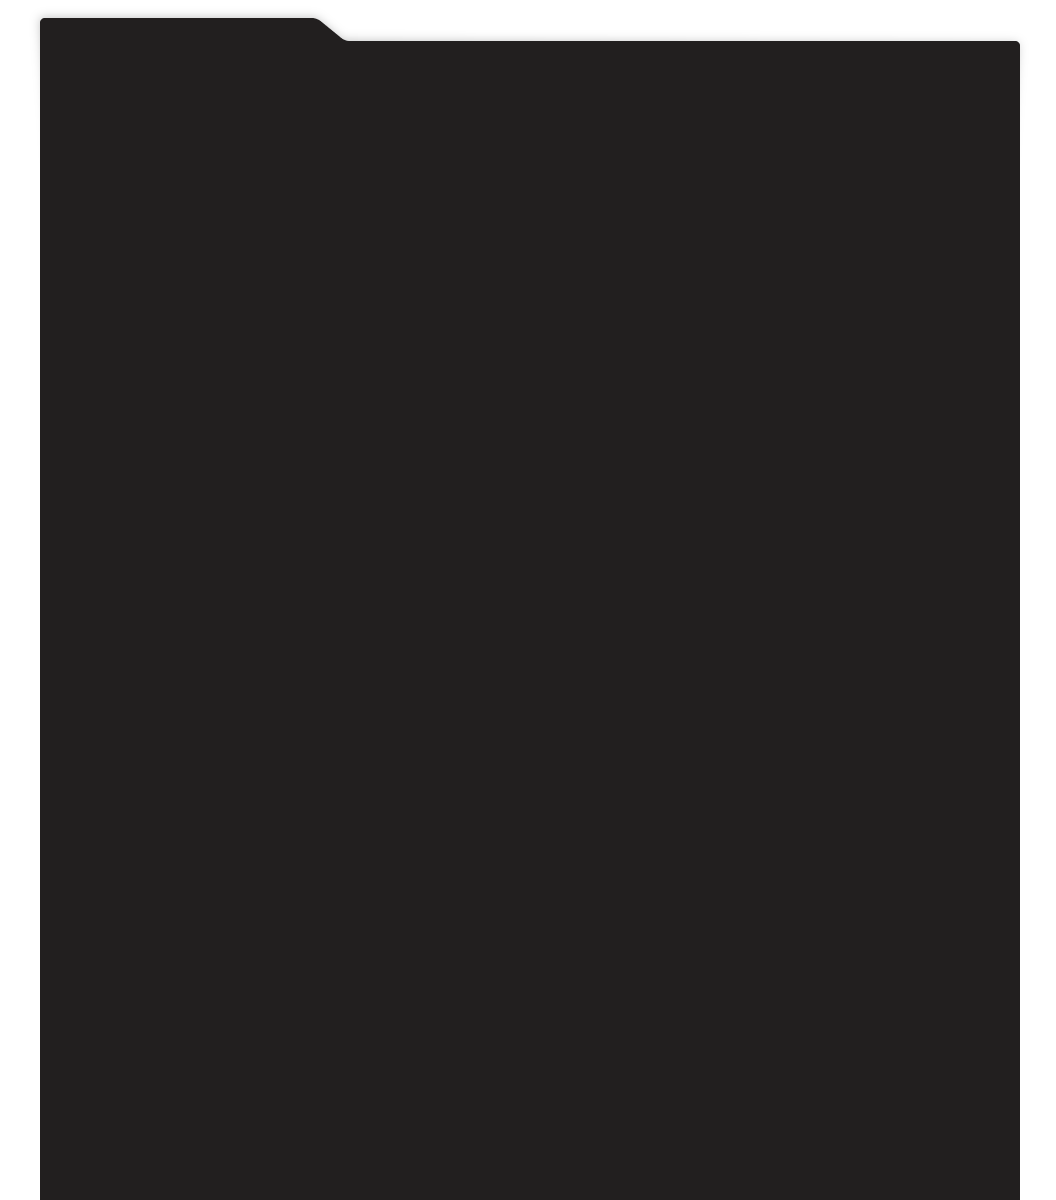
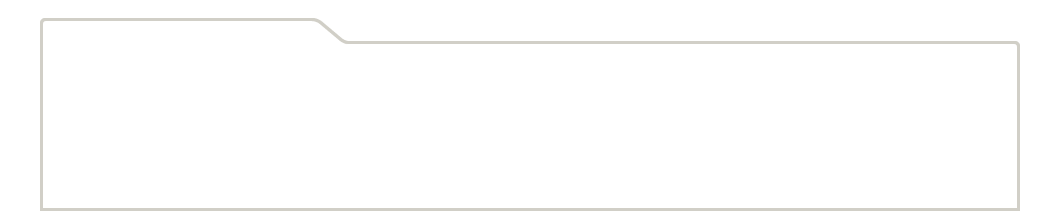
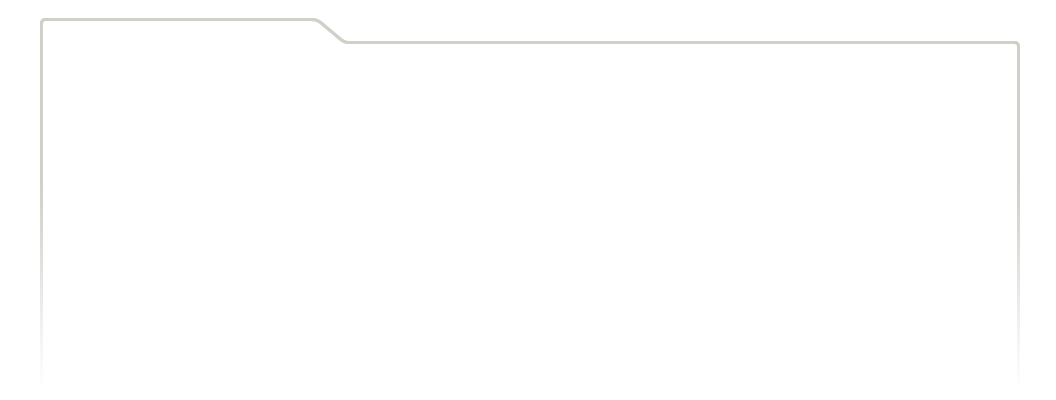
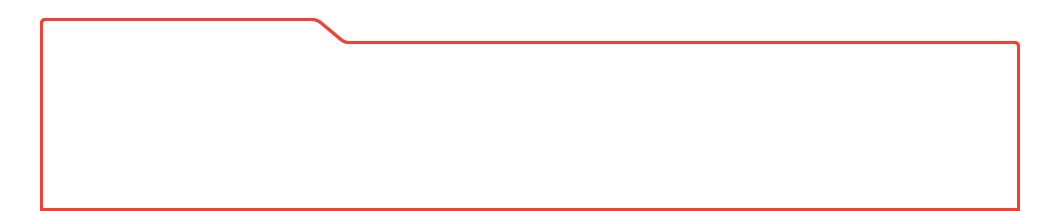
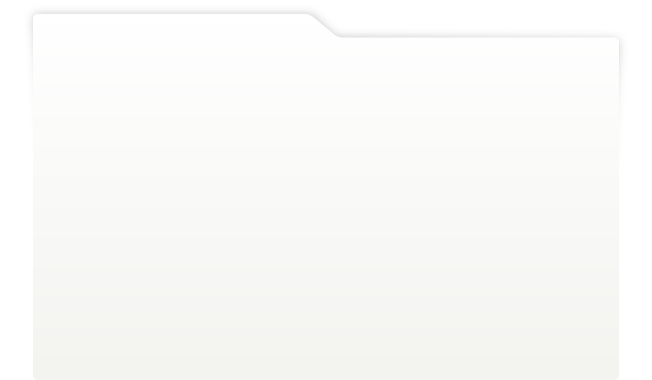
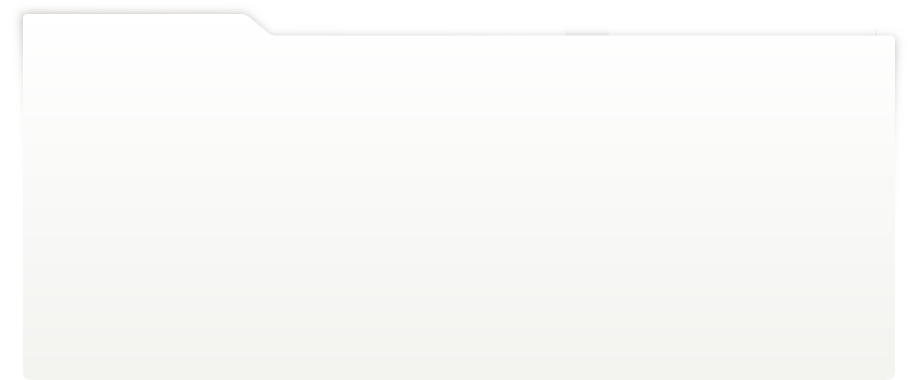
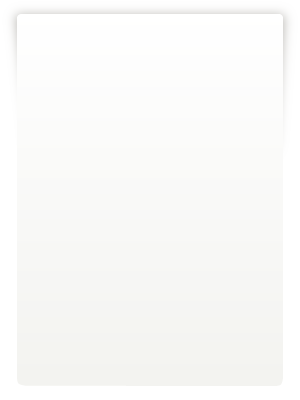
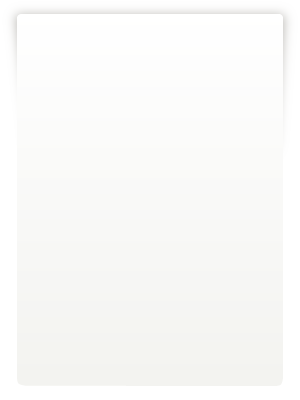
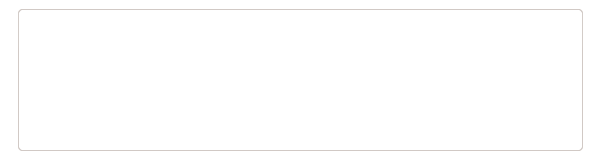
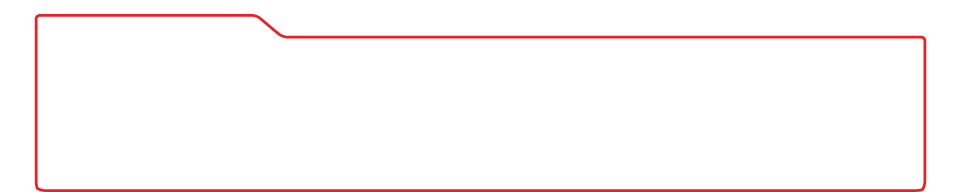
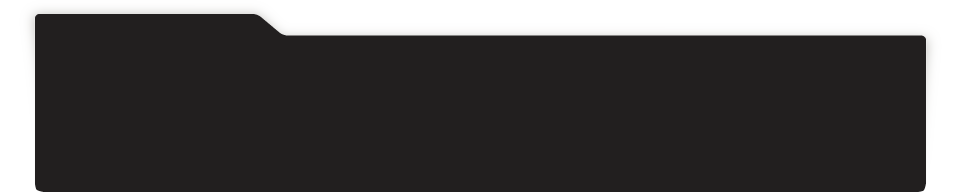
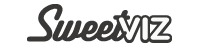
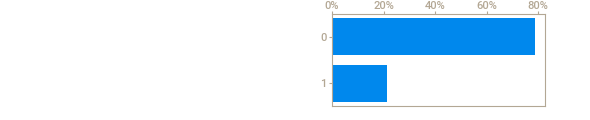
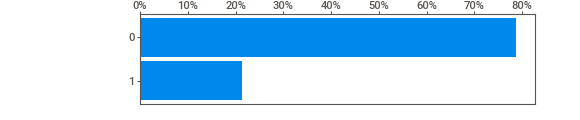
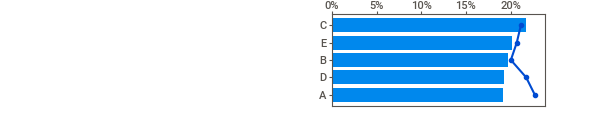
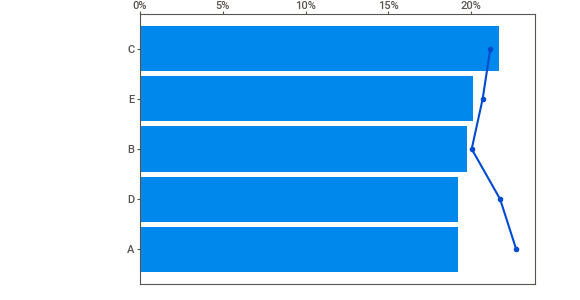
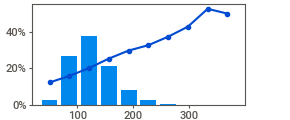
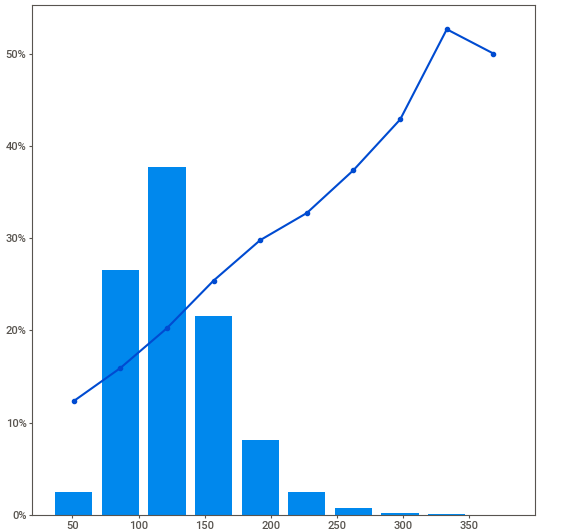
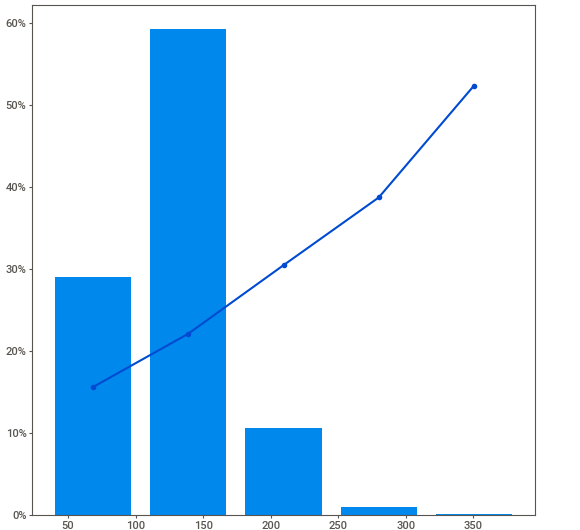
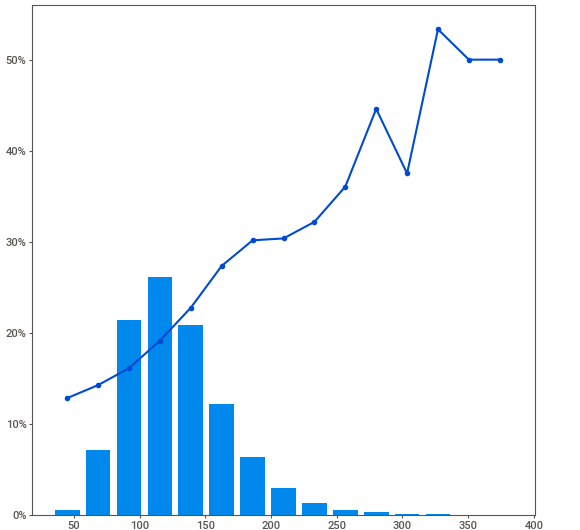
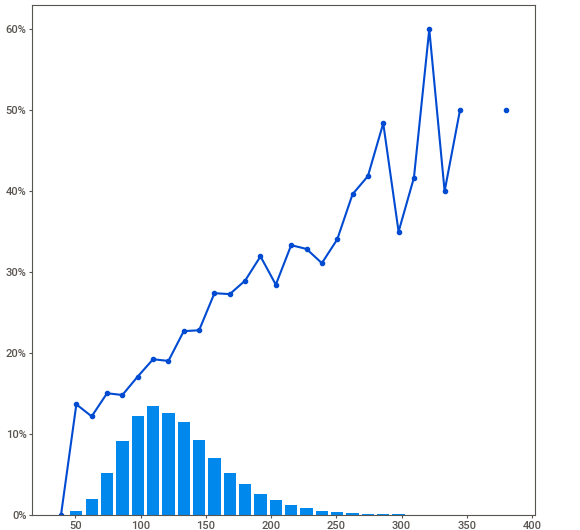
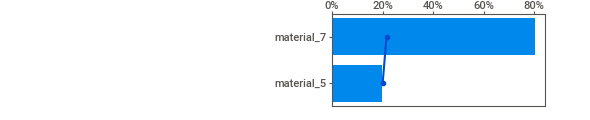
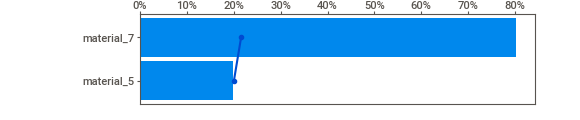
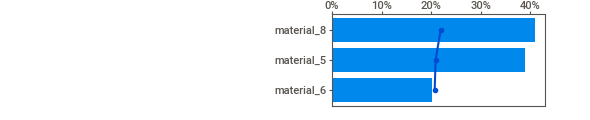
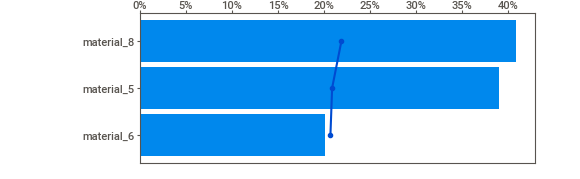
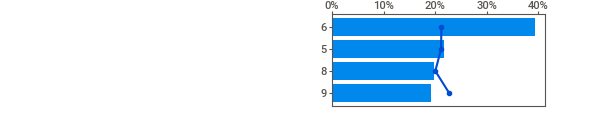
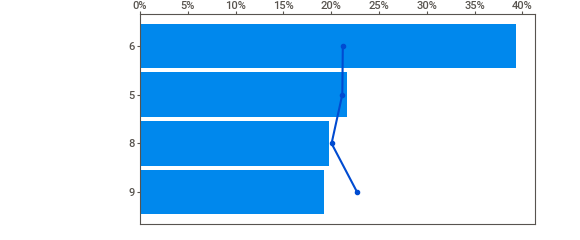
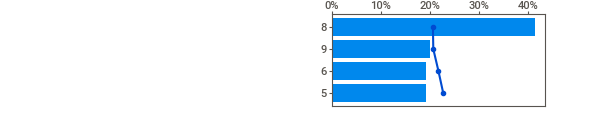
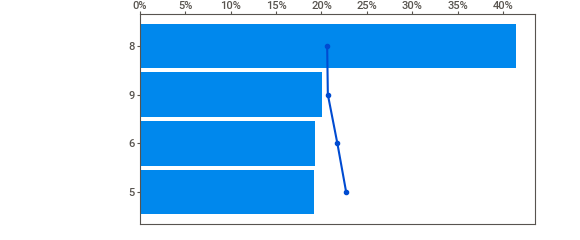
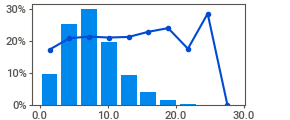
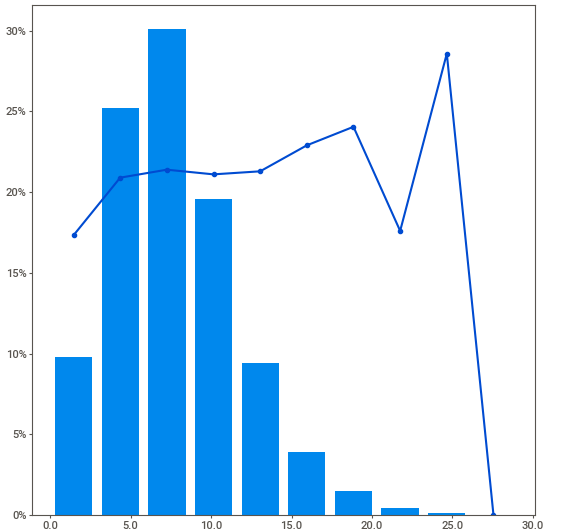
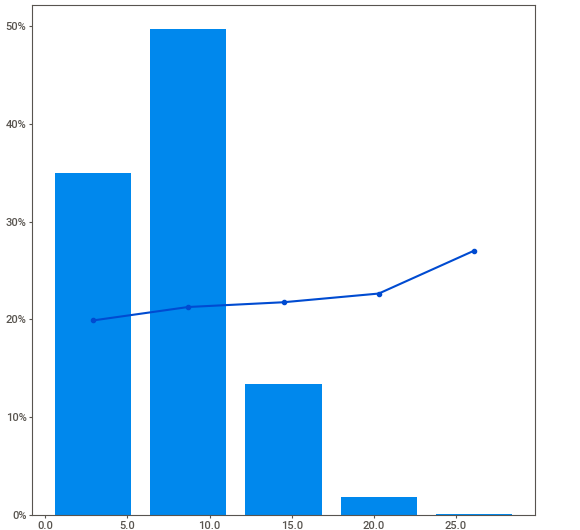
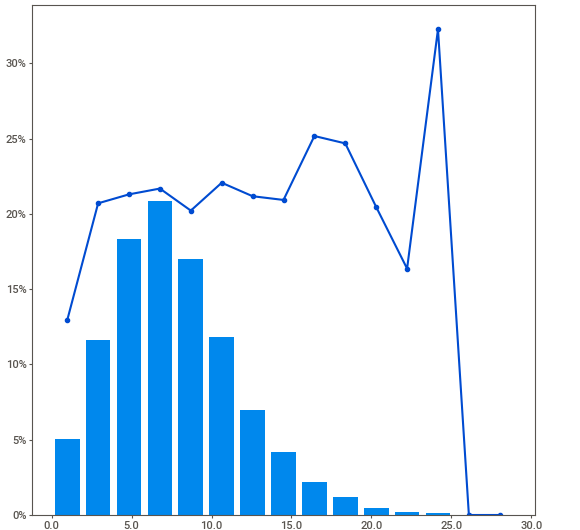
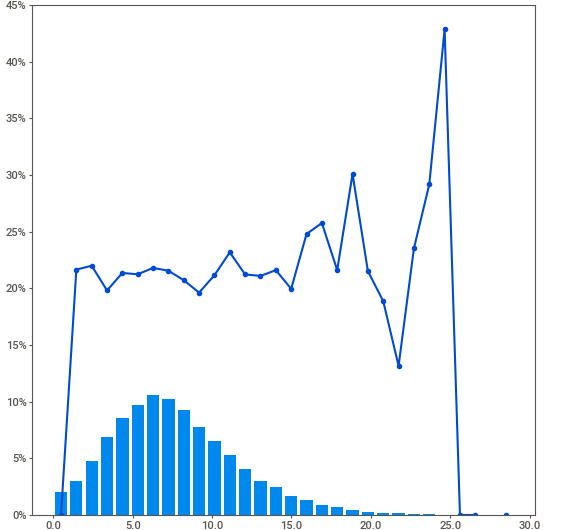
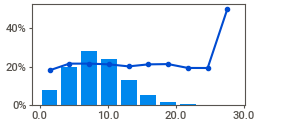
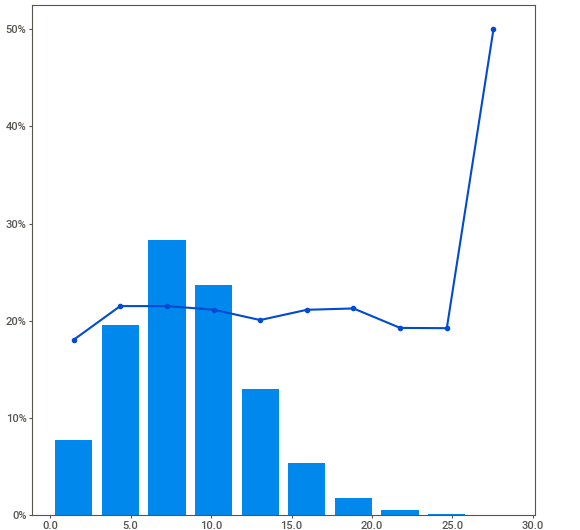
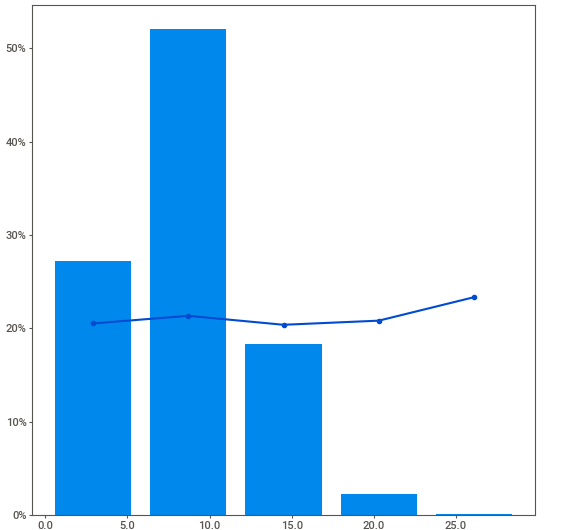
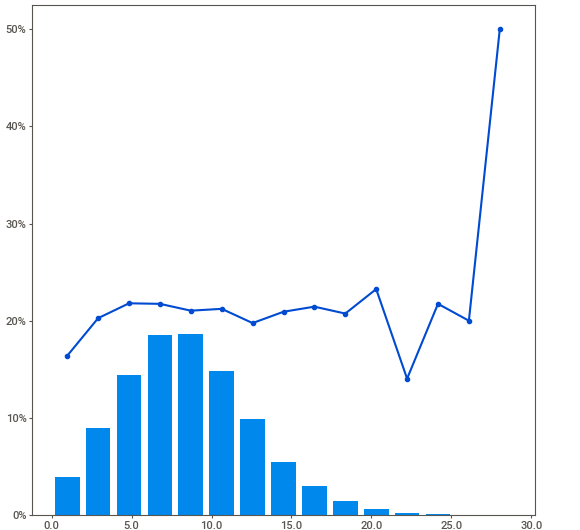
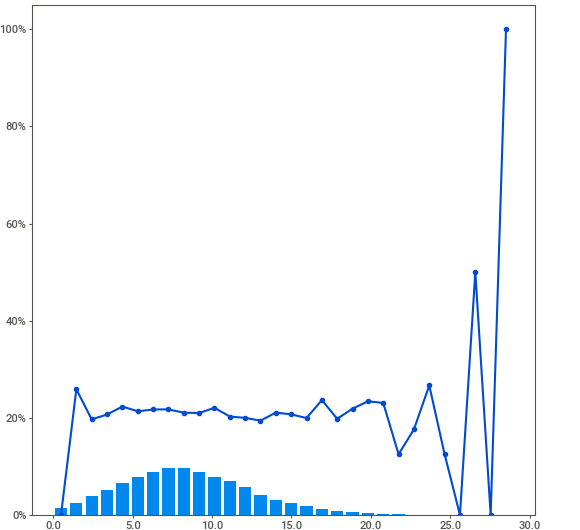
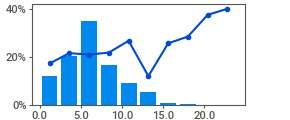
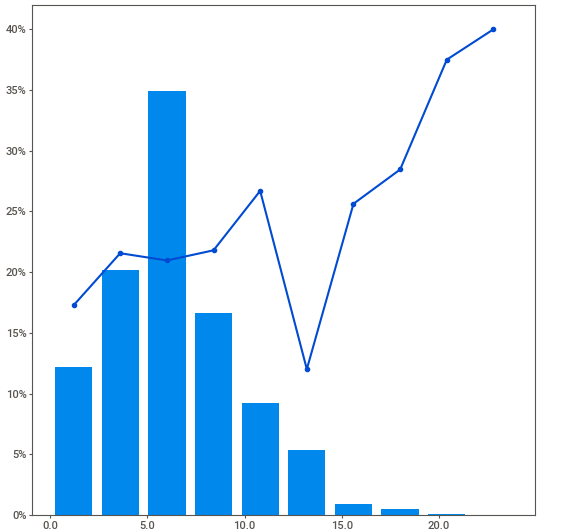
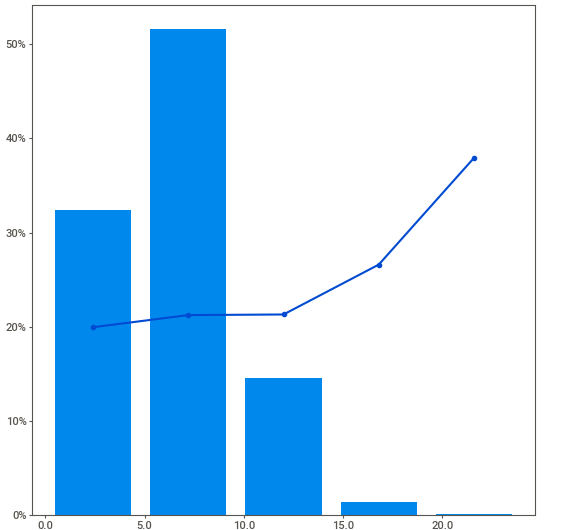
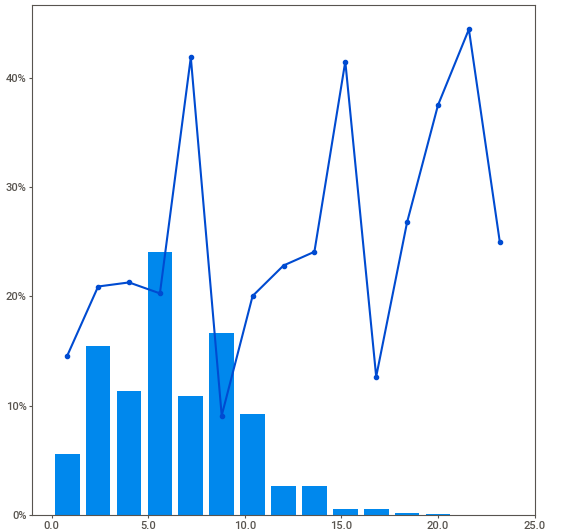
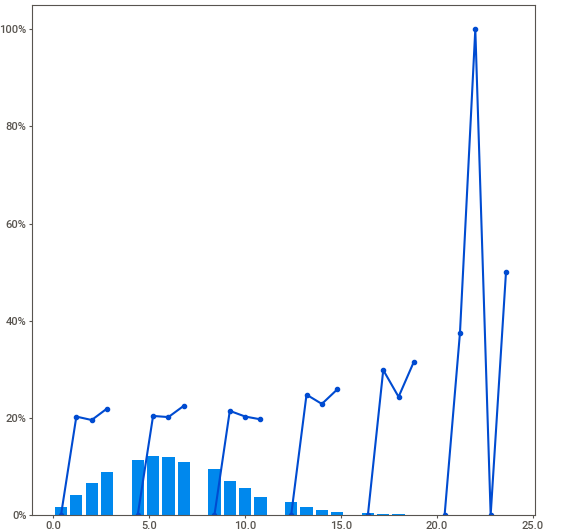
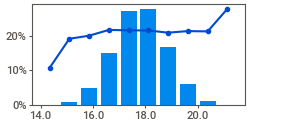
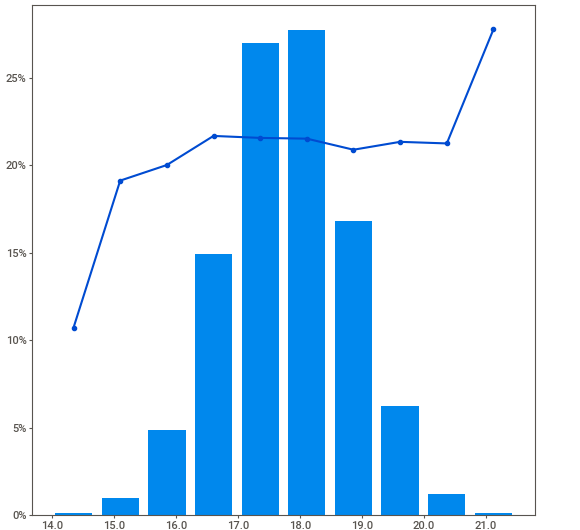
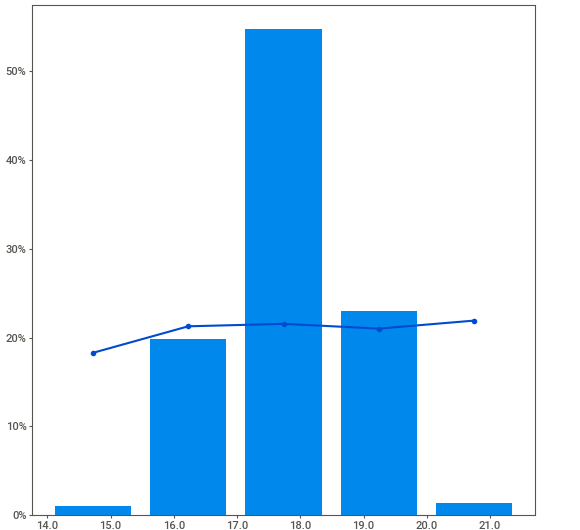
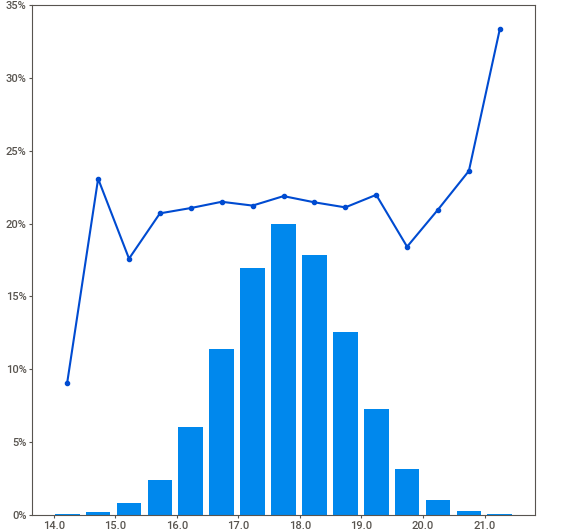
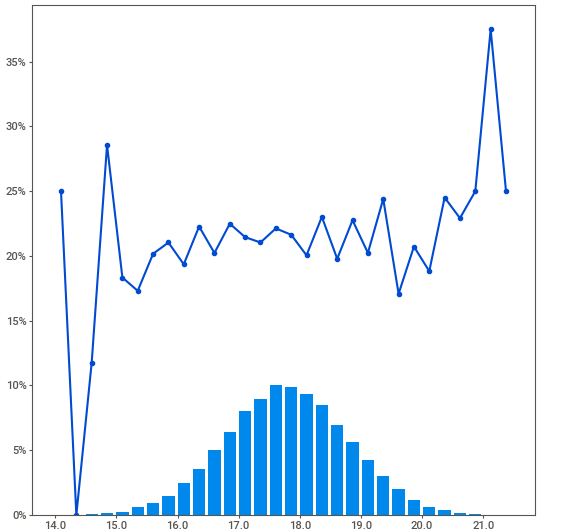
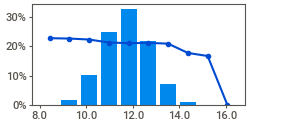
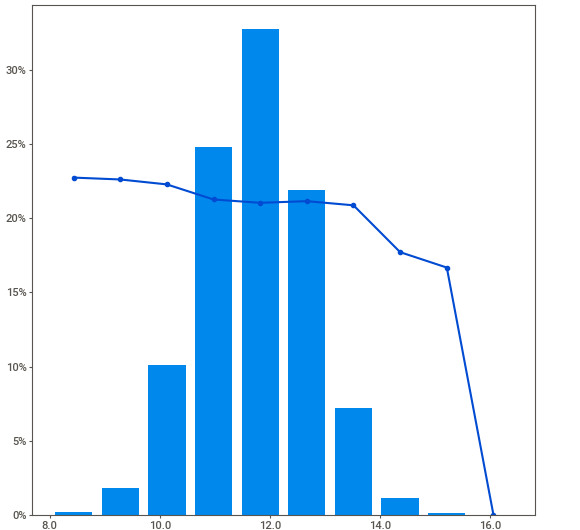
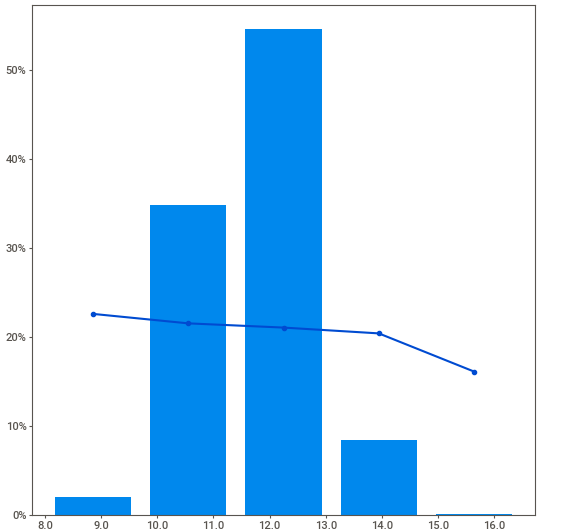
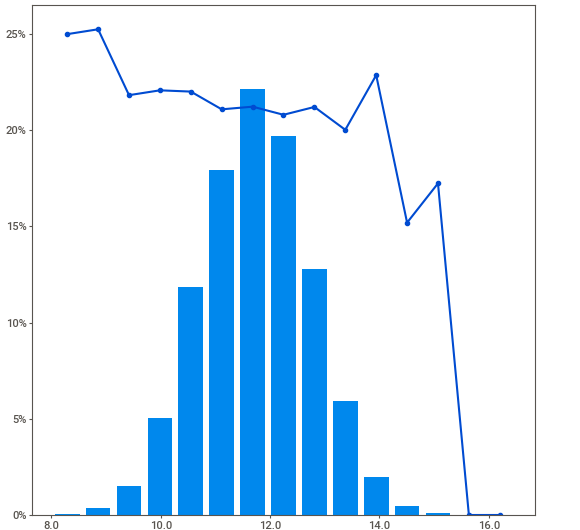
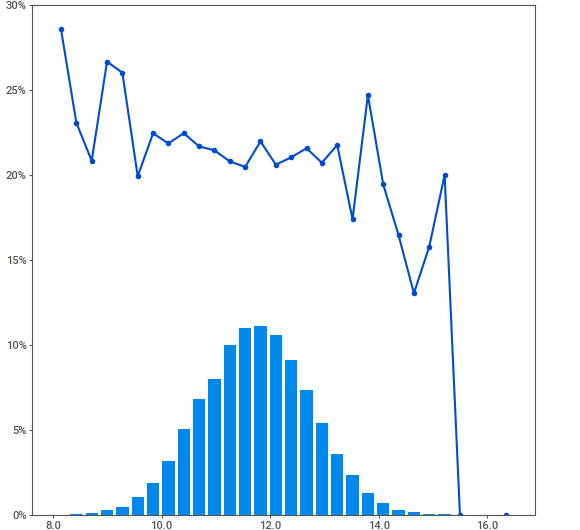
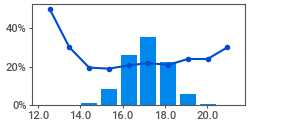
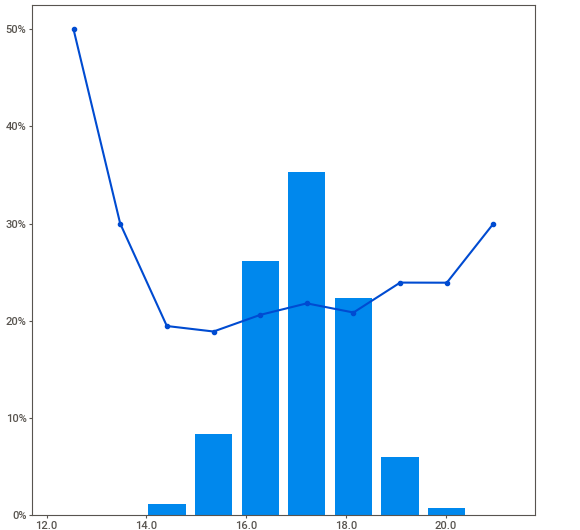
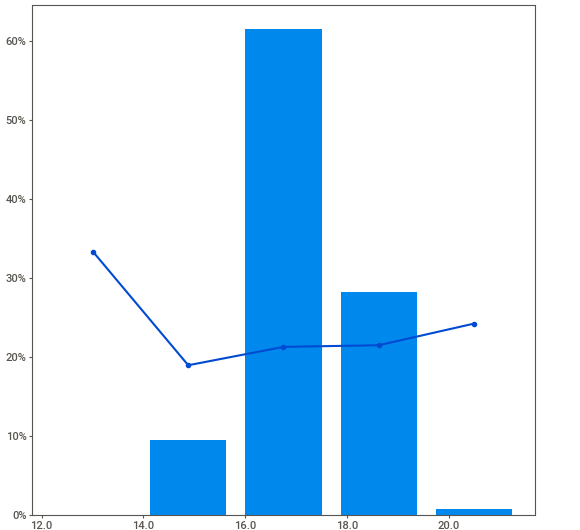
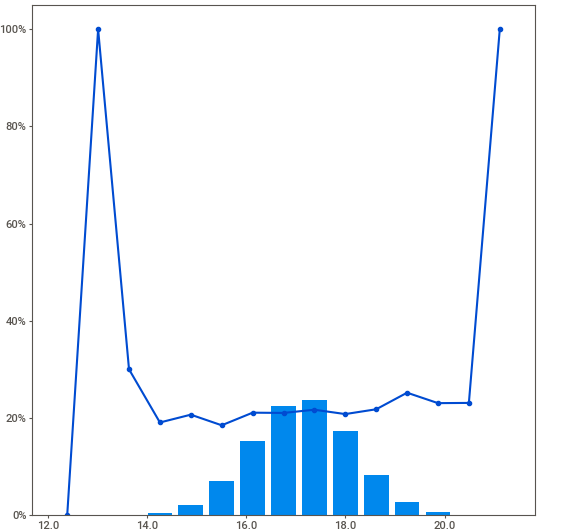
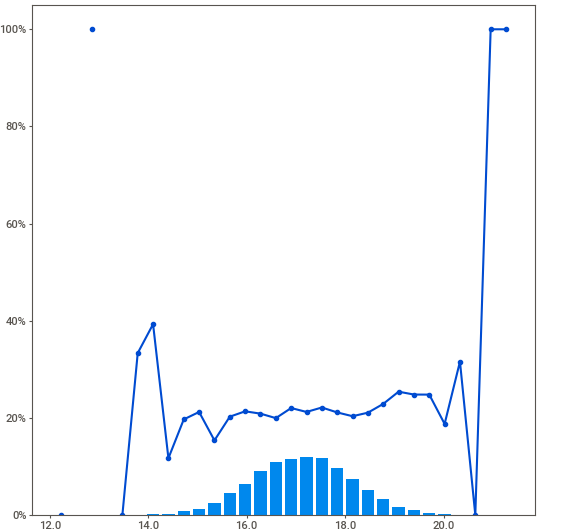
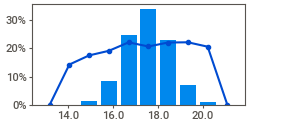
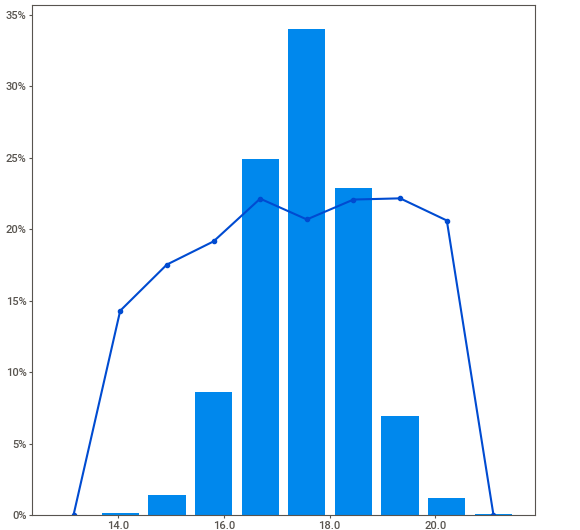
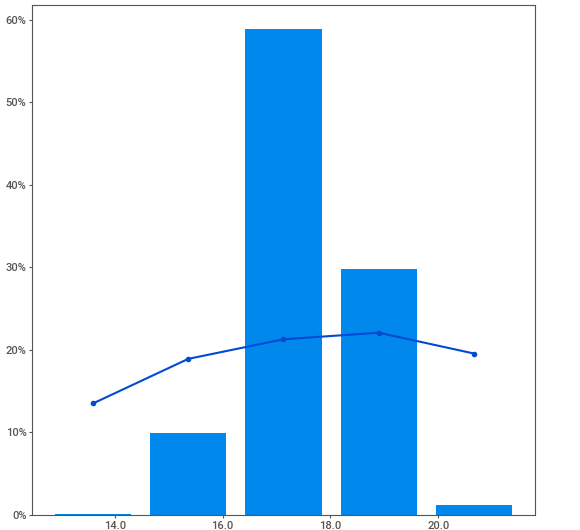
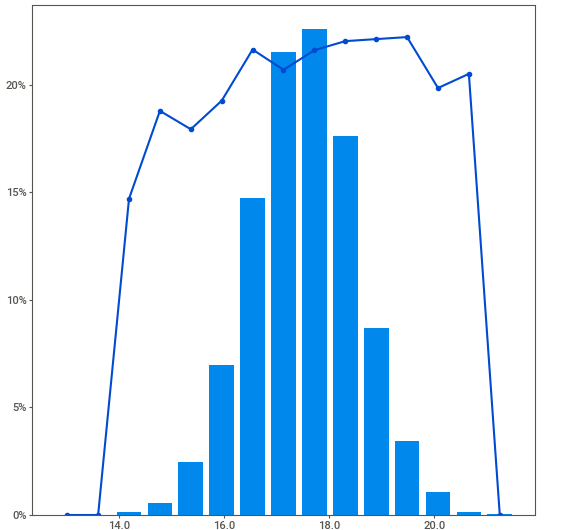
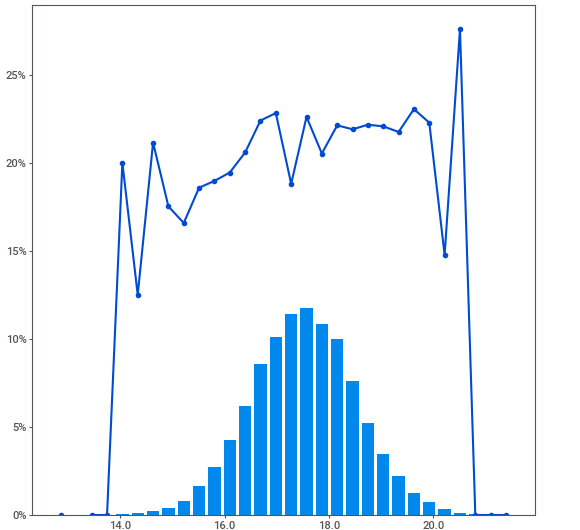
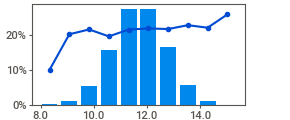
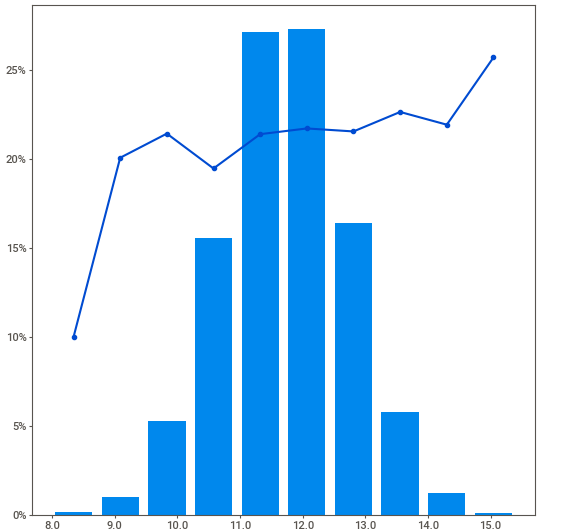
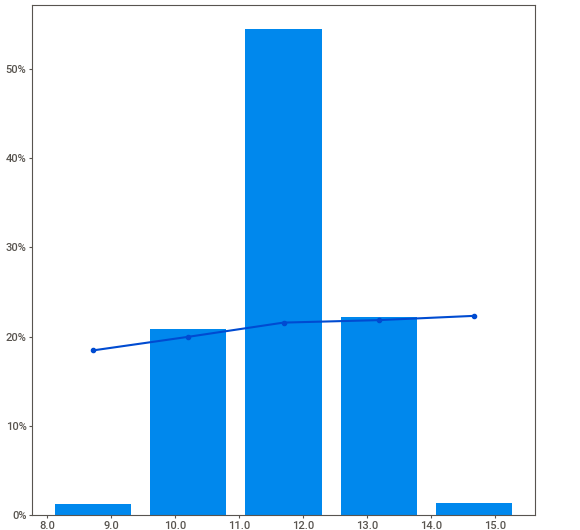
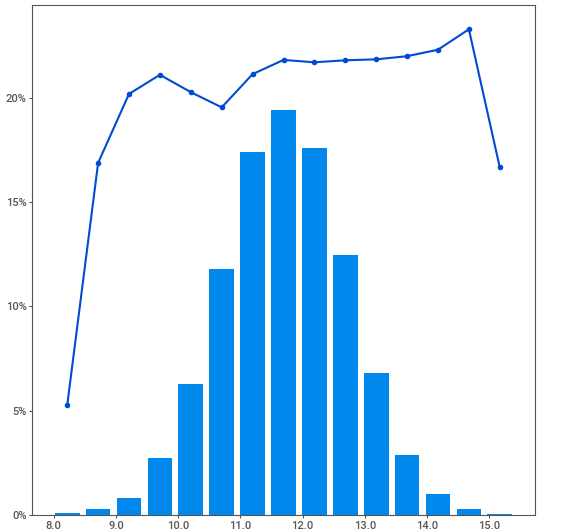
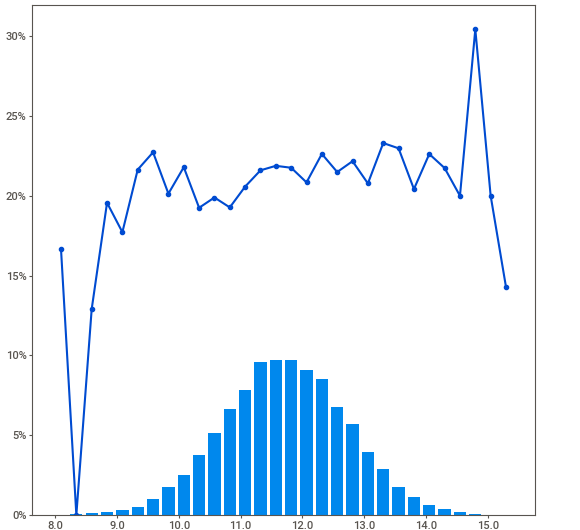
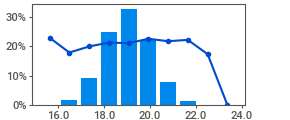
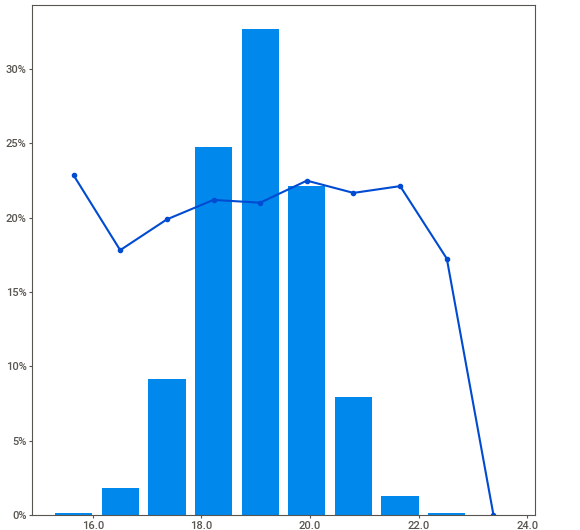
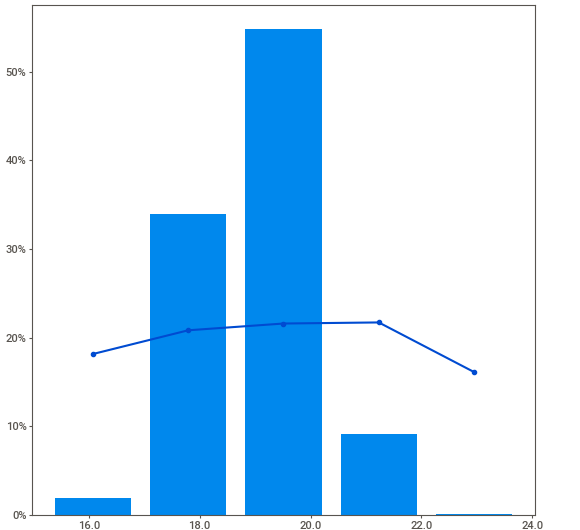
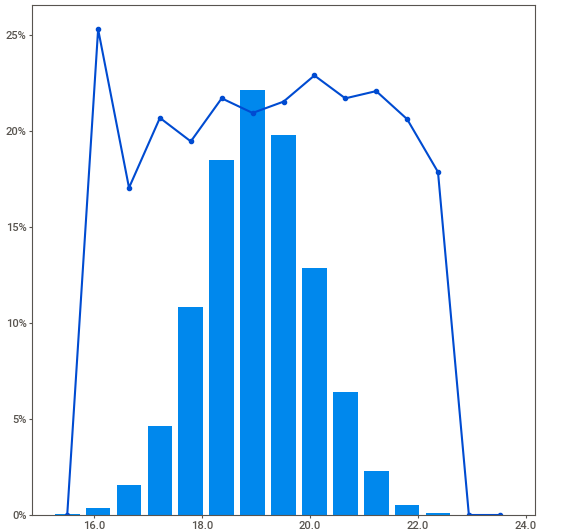
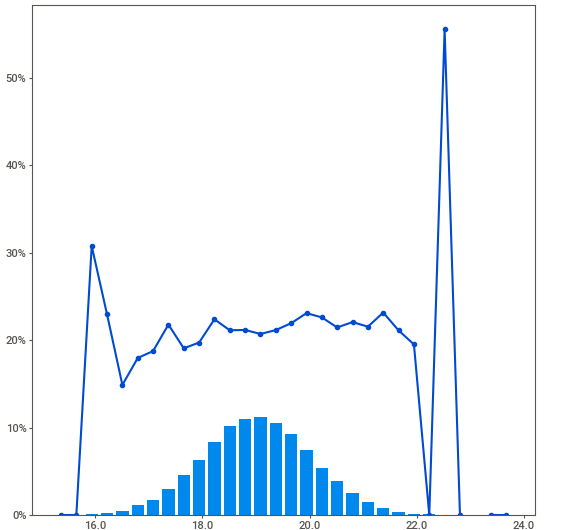
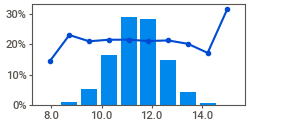
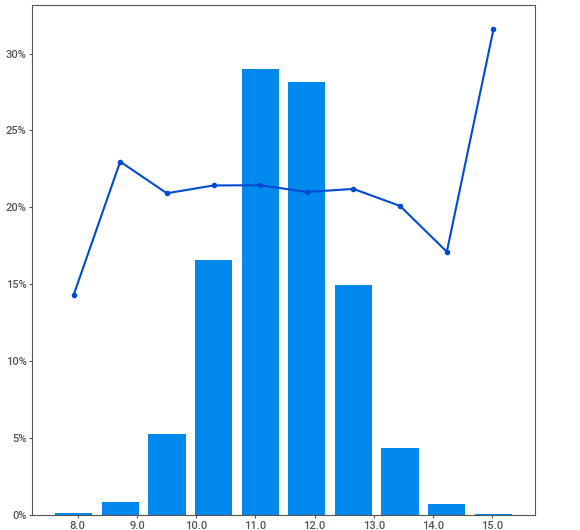
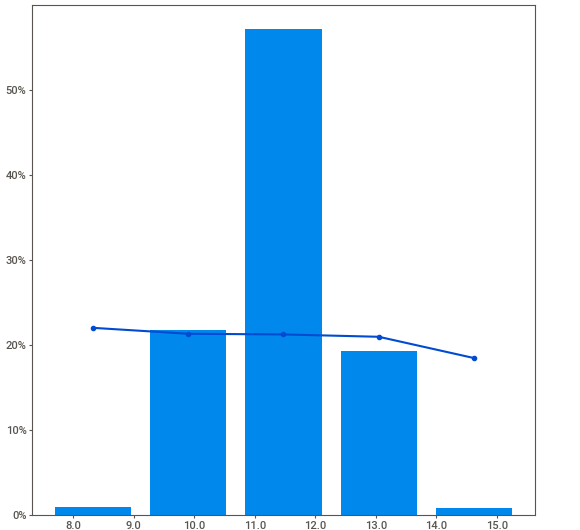
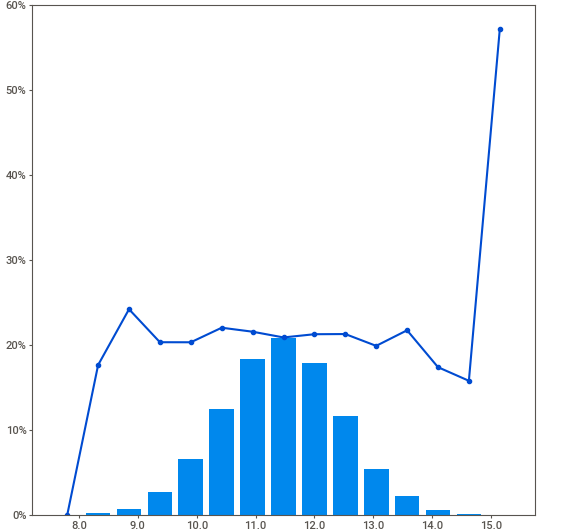
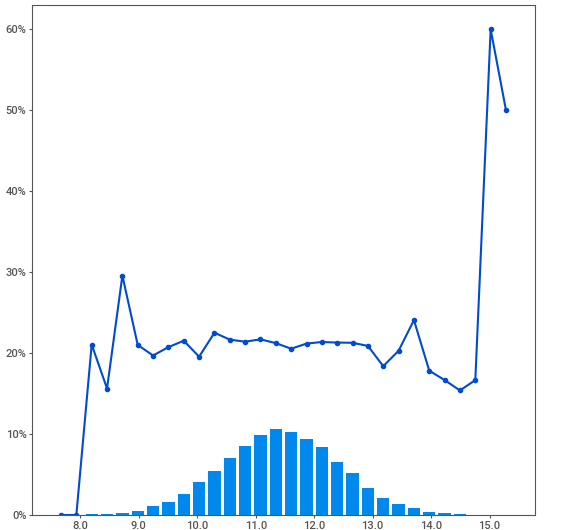
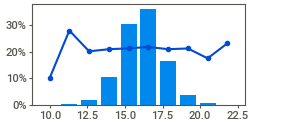
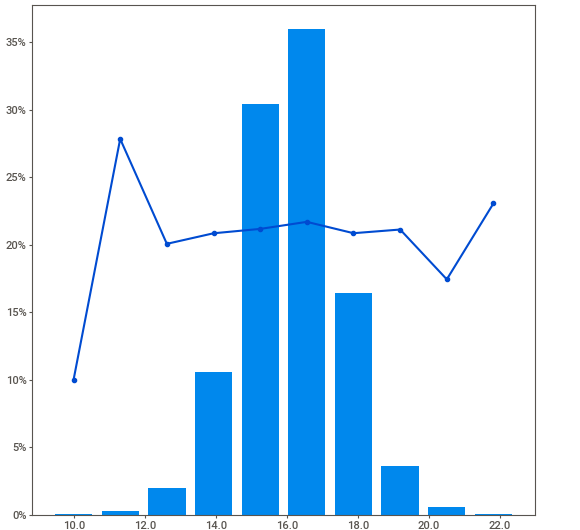
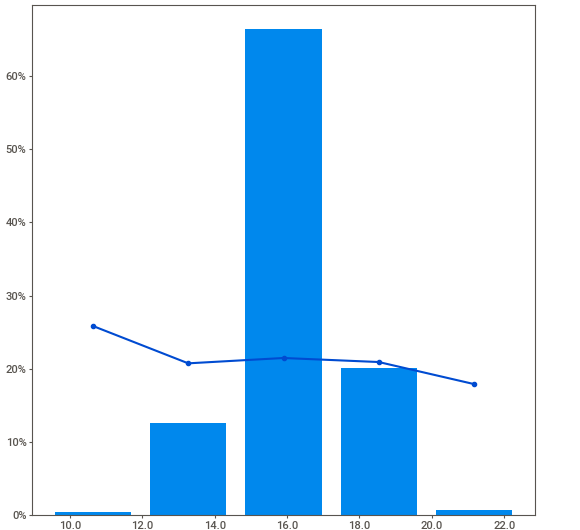
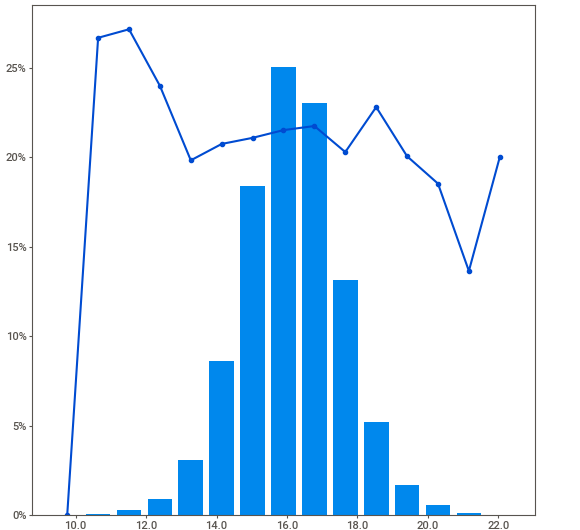
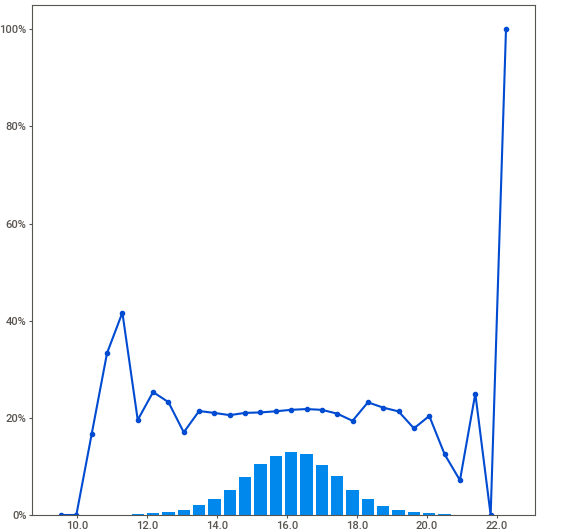
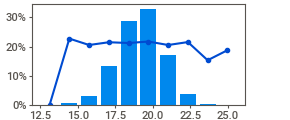
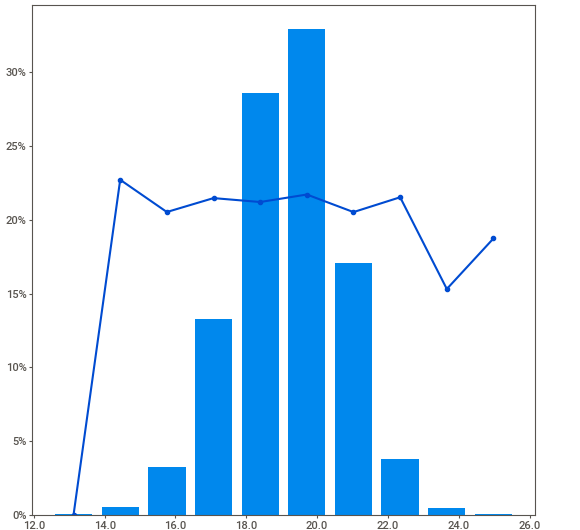
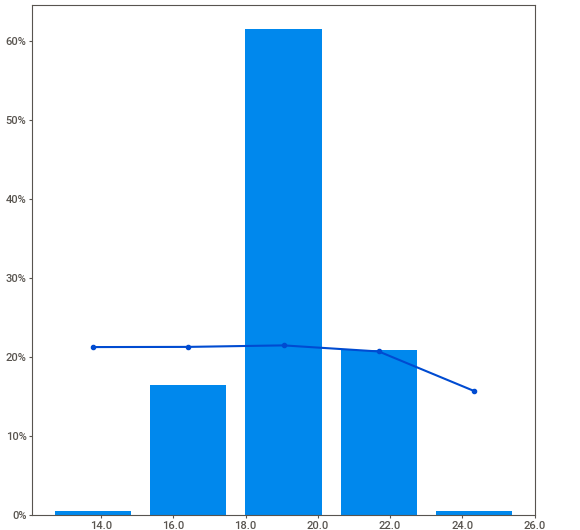
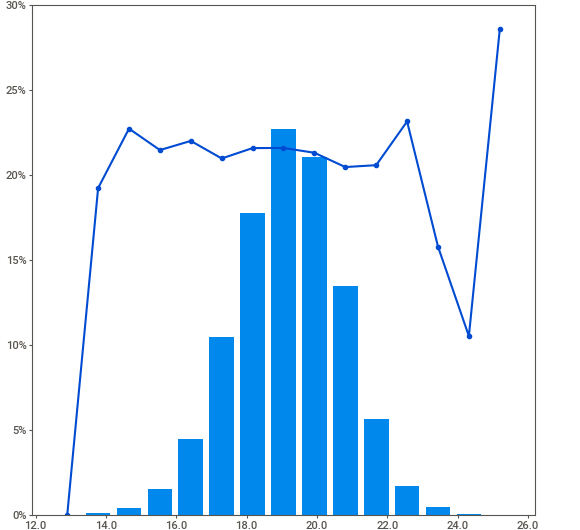
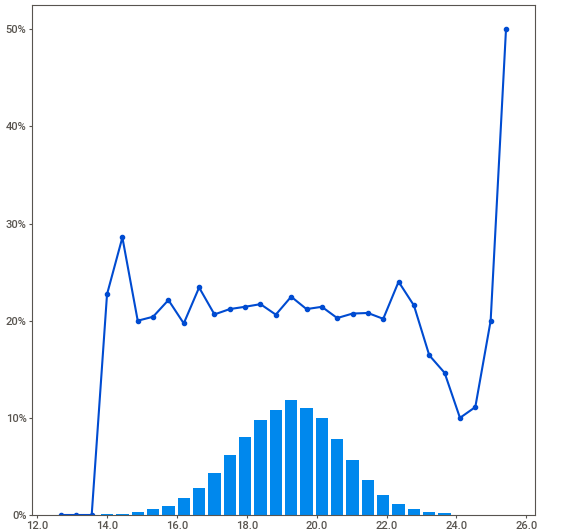
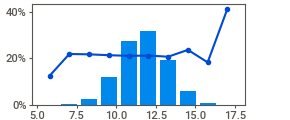
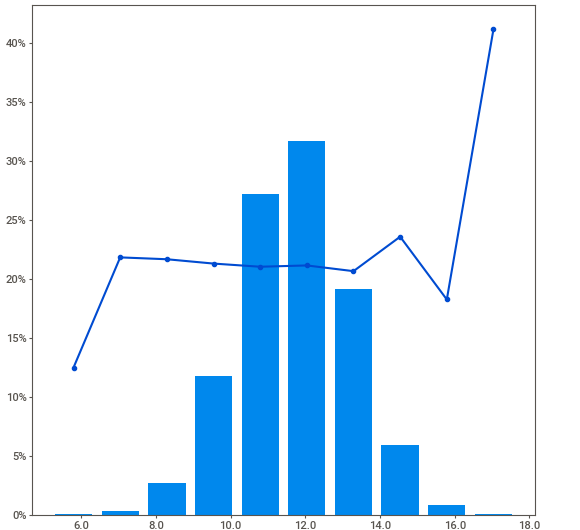
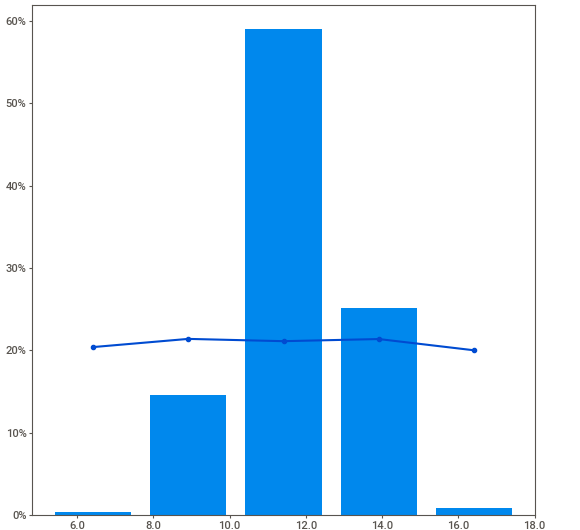
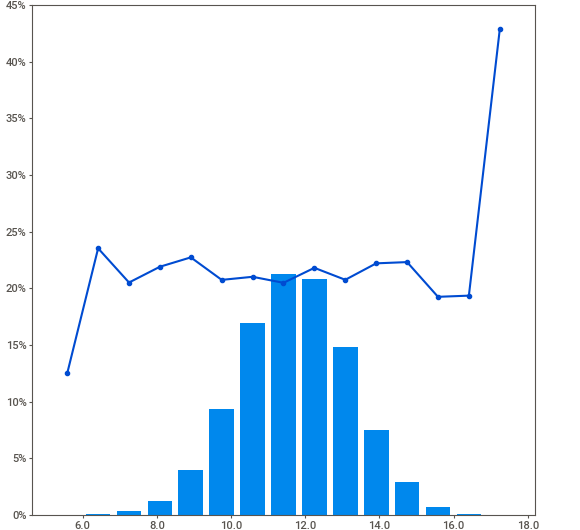
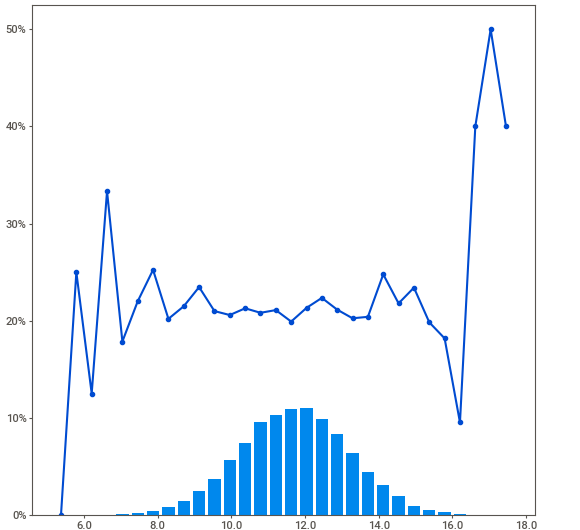
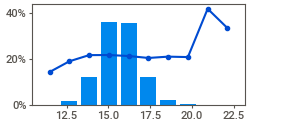
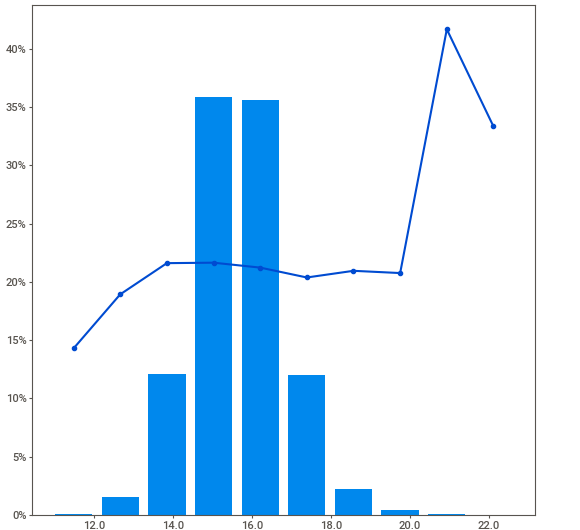
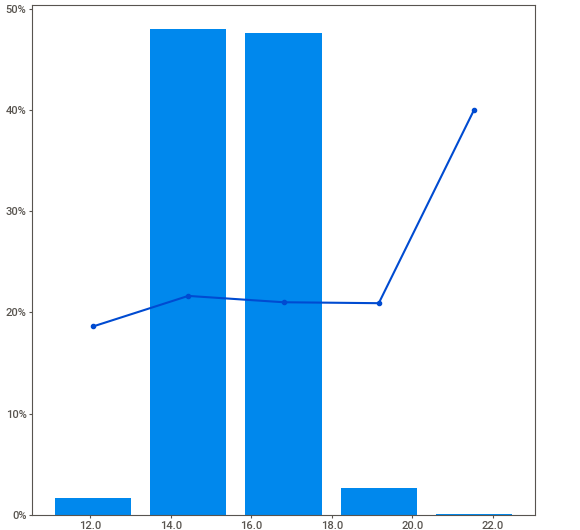
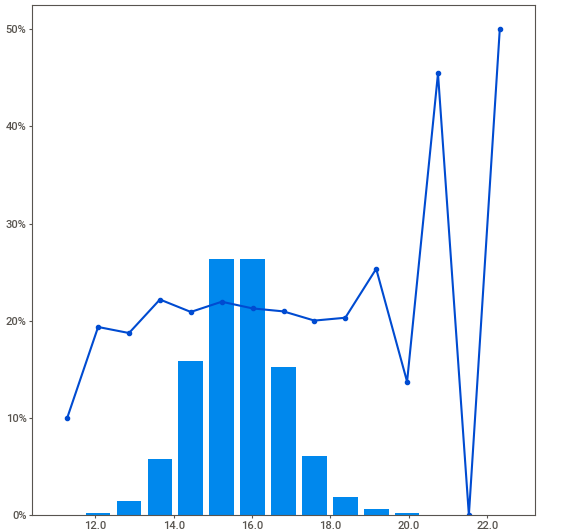
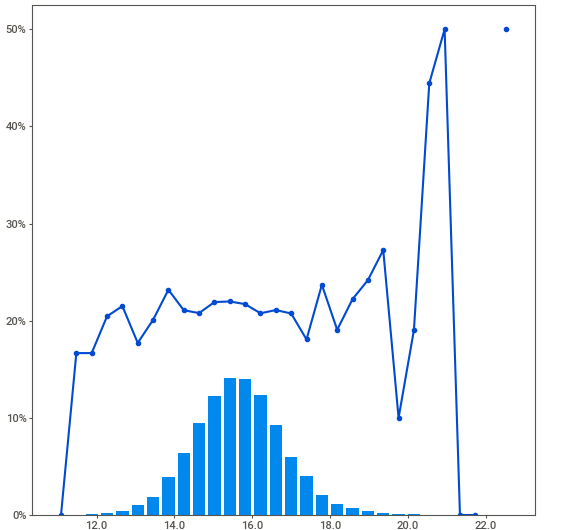
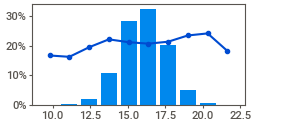
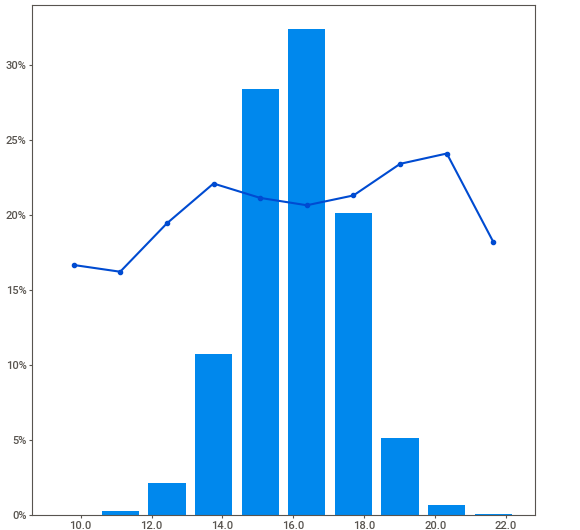
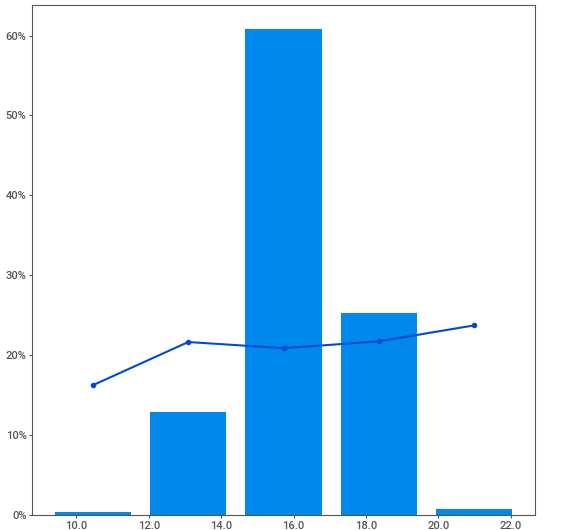
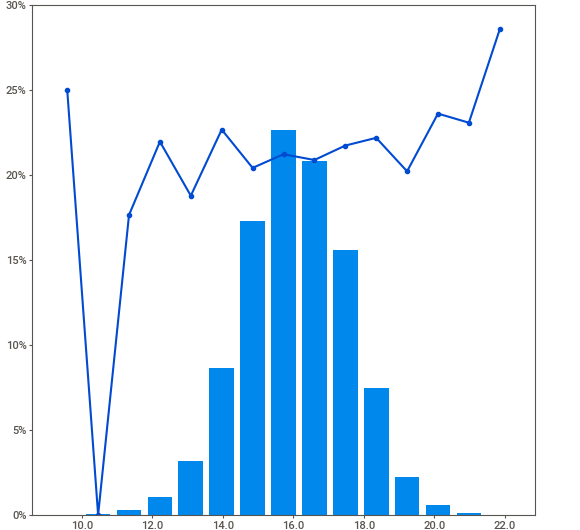
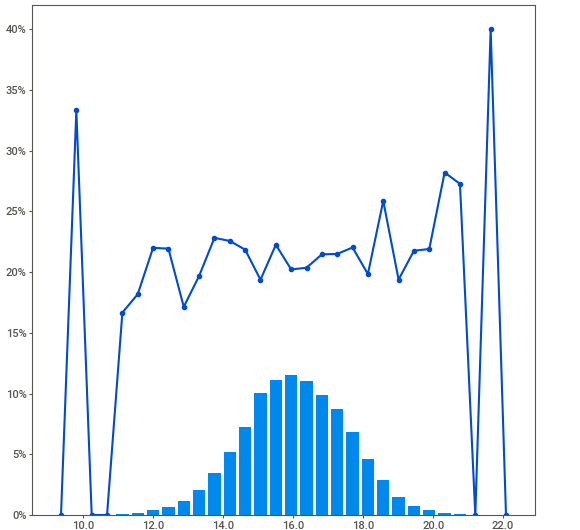
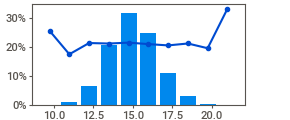
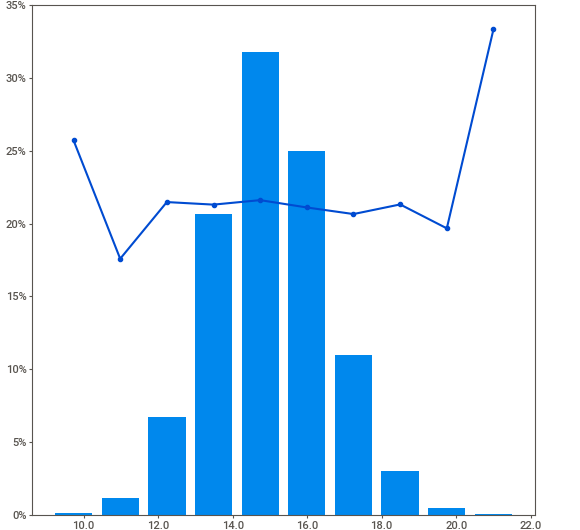
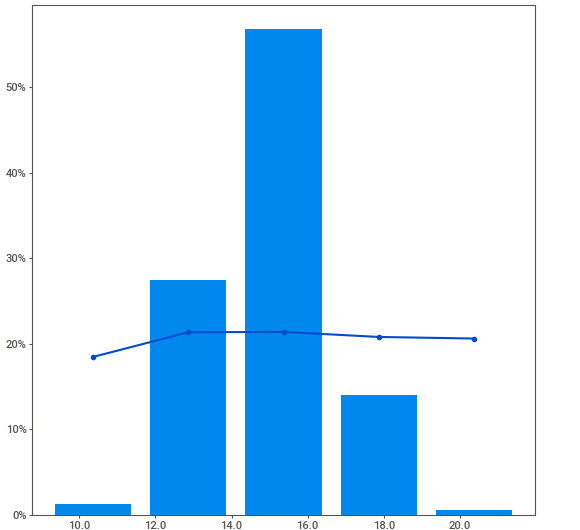
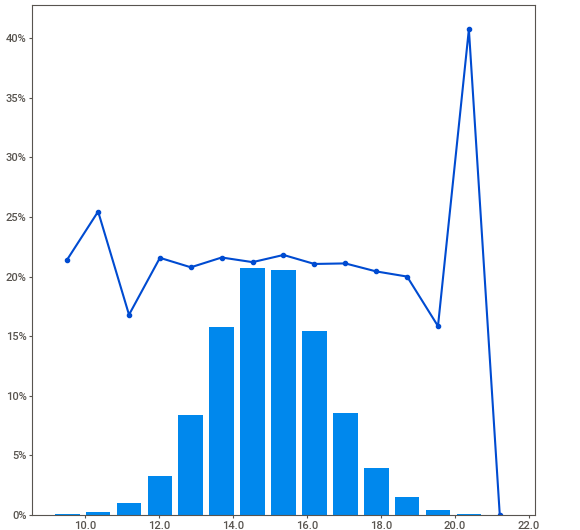
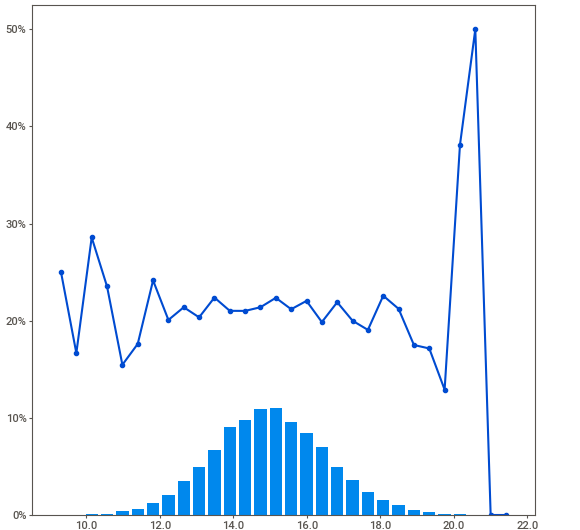
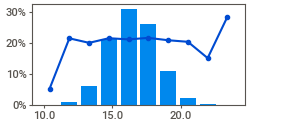
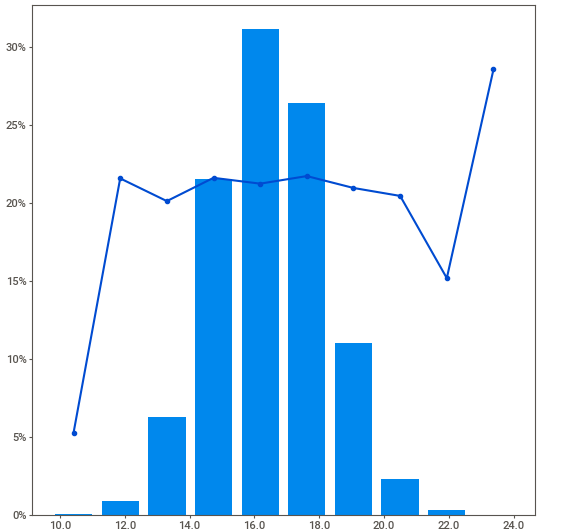
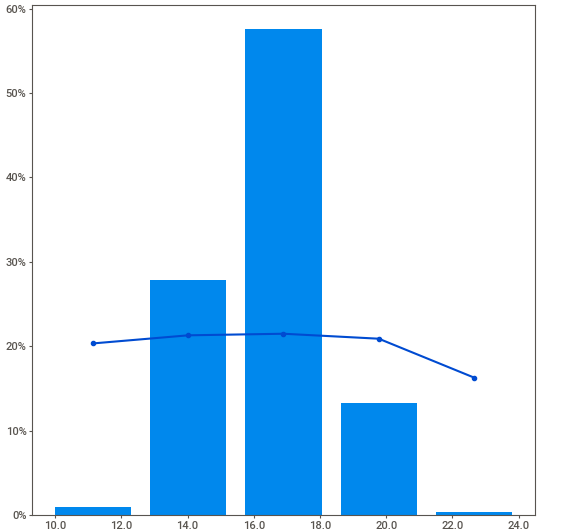
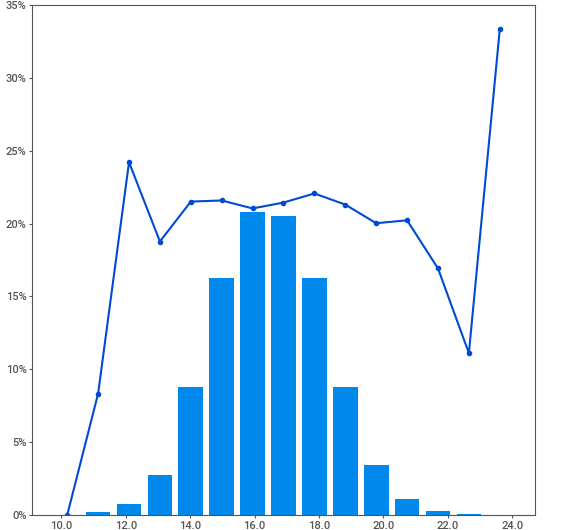
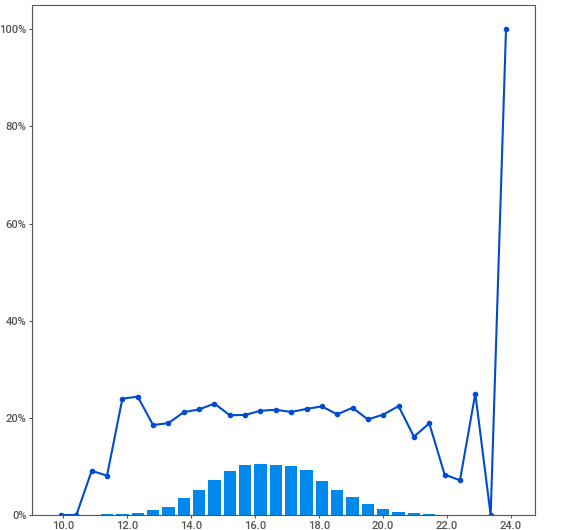
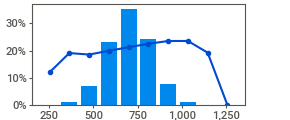
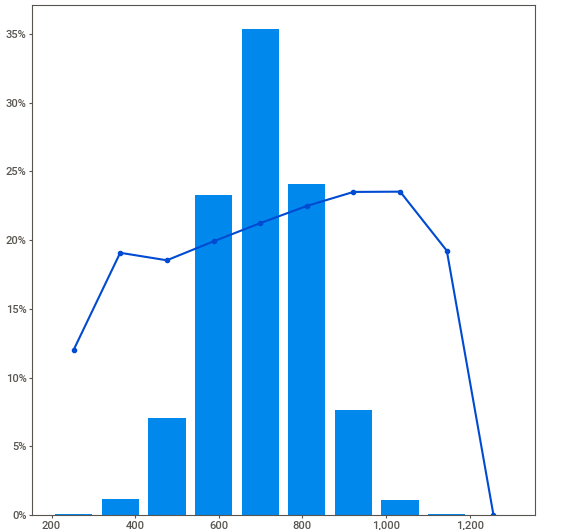
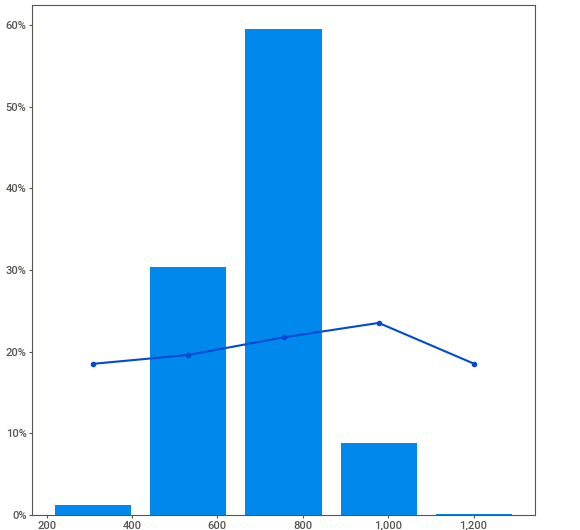
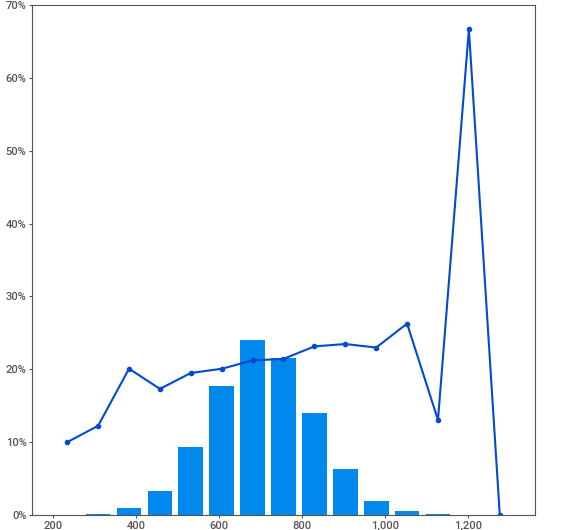
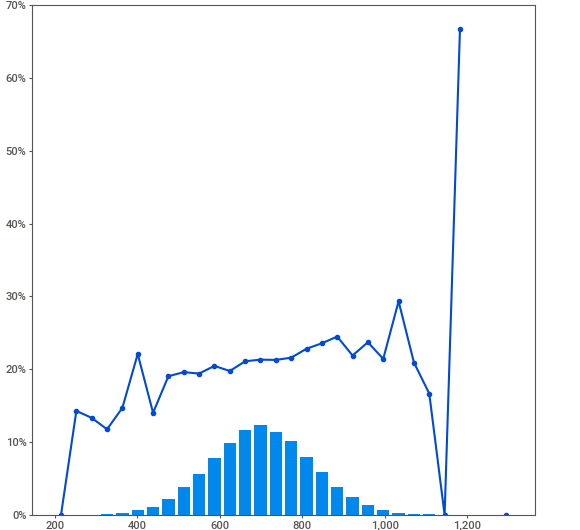
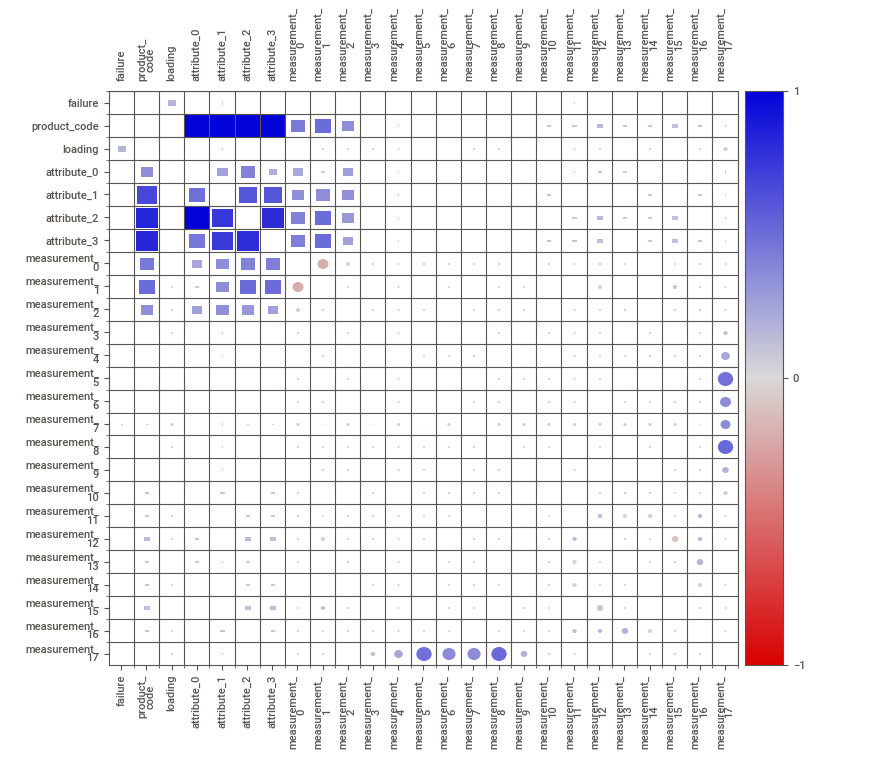
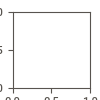

In [5]:
## creating a EDA report
feature_config = sv.FeatureConfig(skip="id") #  removing ID column from EDA
analyze_report = sv.analyze(data, target_feat = 'failure', feat_cfg = feature_config)
# IMPORTANT: only numerical and boolean features can be targets currently.
analyze_report.show_notebook(layout='vertical', w=800, h=300, scale=0.7)
# analyze_report.show_notebook(layout='widescreen', w=1500, h=300, scale=0.7) will use the vertical instead

## Let's illustrate our findings 

26570 rows with 0 duplicates. No text features; only numerical and categorical. 
No missing values in target column. An imbalance (~ 80:20) is present

### Features and their relation with target values 

#### Product code
5 categories. Although A is lowest category, it has the highest percentage of failures (23%). 

#### Loading 
seems to be associated with failure

#### measurement 0,1,2 
integers(few zeros - no missing).

#### measurement 3 - 8
real numbers (missng <5% - no zeros)

#### measurement 9 - 17
real numbers (missng 5 - 9% - no zeros)

#### measurement 17 
range is higher than all other columns 

## Correlations and associations
> [Powerful EDA (Exploratory Data Analysis) in just two lines of code using Sweetviz | by Francois Bertrand | Towards Data Science](https://towardsdatascience.com/powerful-eda-exploratory-data-analysis-in-just-two-lines-of-code-using-sweetviz-6c943d32f34)

Basically, in addition to showing the traditional numerical correlations, it unifies in a single graph both numerical correlation but also the uncertainty coefficient (for categorical-categorical) and correlation ratio (for categorical-numerical). Squares represent categorical-featured-related variables and circles represent numerical-numerical correlations. Note that the trivial diagonal is left empty, for clarity.

## Associtations


From the associtation report, we can see that product code is highly associated with all attributes. Attributes two and three are mostly associated with each others. 
IMPORTANT: categorical-categorical associations (provided by the uncertainty coefficient) are ASSYMMETRICAL, meaning that each row represents how much the row title (on the left) gives information on each column.
Since the association is asymettrical, it seems that product code influences all attributes but is influenced mainly by attributes 2 and 3. 

## Correlations 

Measurements 0 and 1 are inversely correlated. Measurements 5-8 are positively correlated with measurement 17

Finally, it is worth noting these correlation/association methods shouldn’t be taken as gospel as they make some assumptions on the underlying distribution of data and relationships. However they can be a very useful starting point.

## Comparison report
> we need to compare training and test sets to make sure the distribution os not quite different. 

                                             |          | [  0%]   00:00 -> (? left)


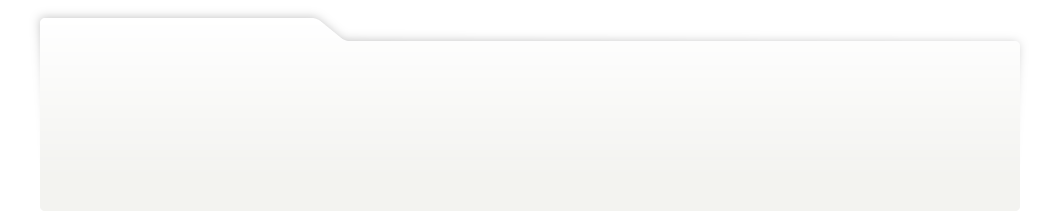
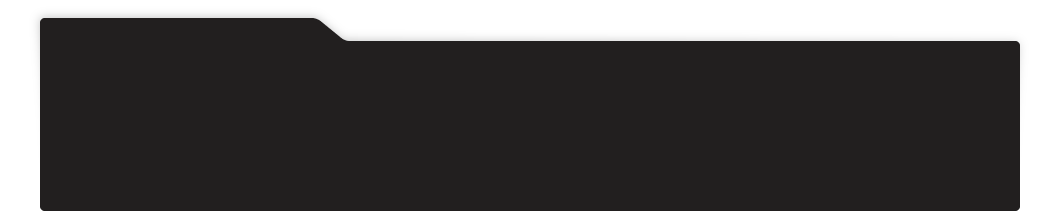
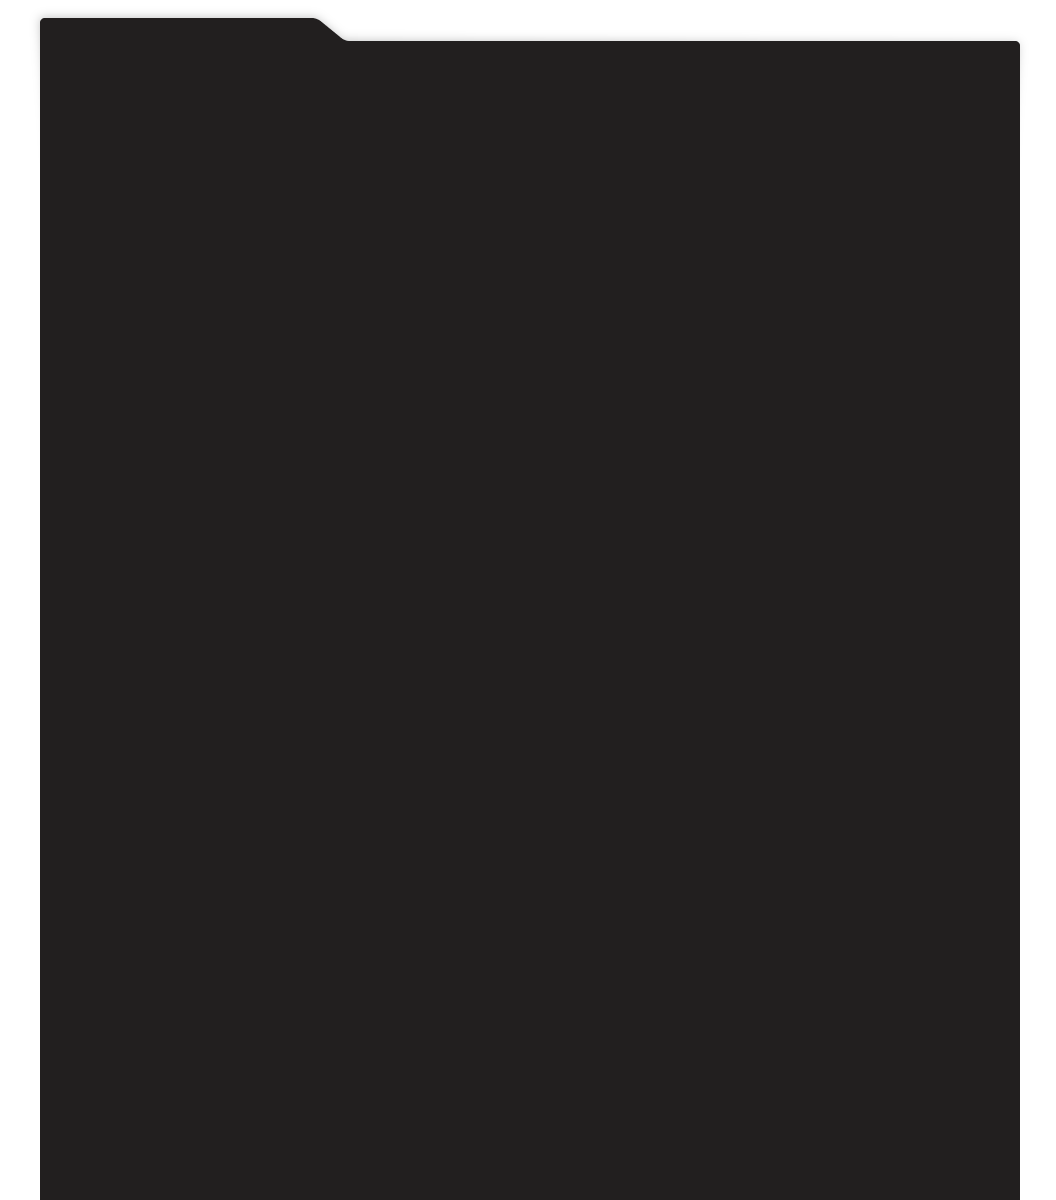
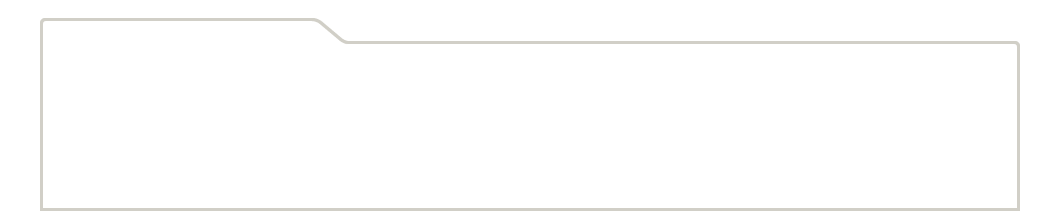
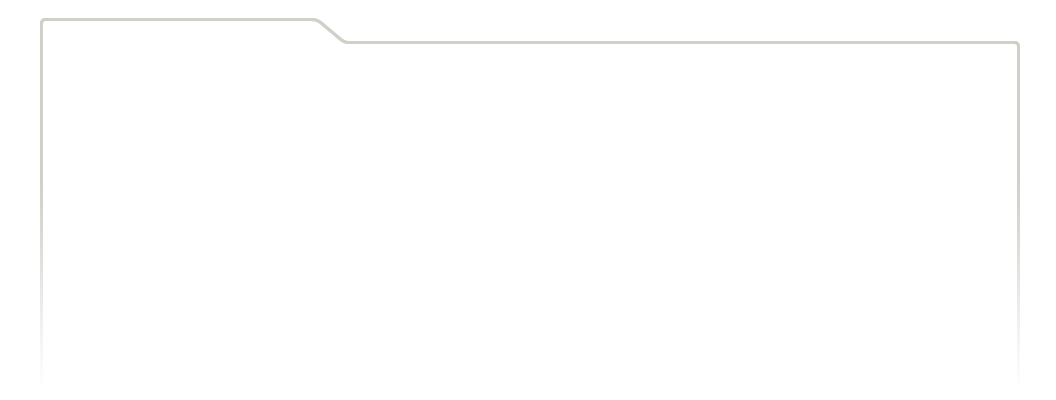
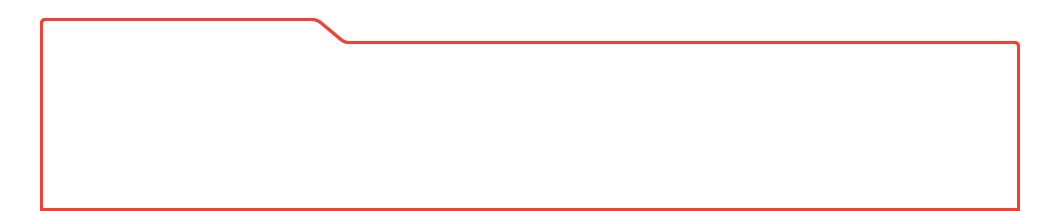
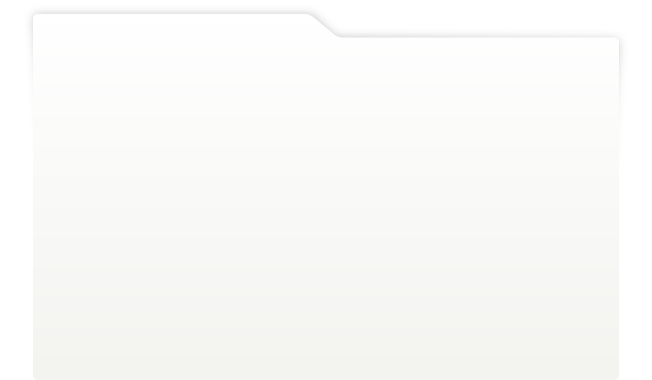
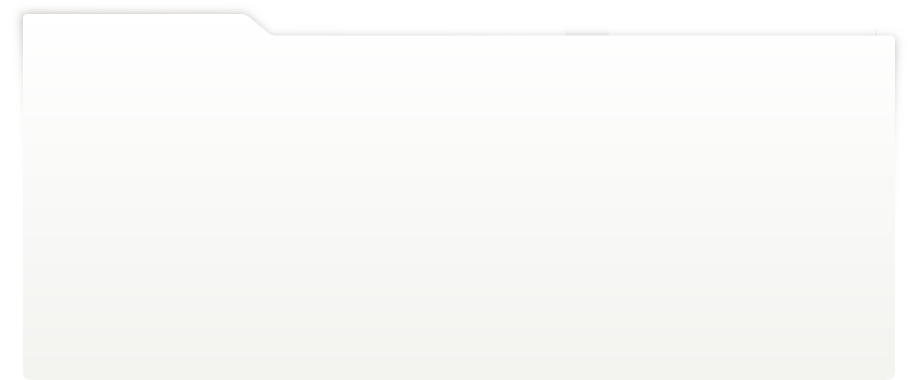
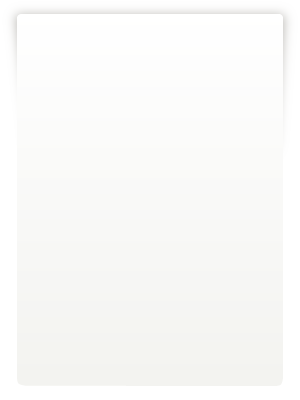
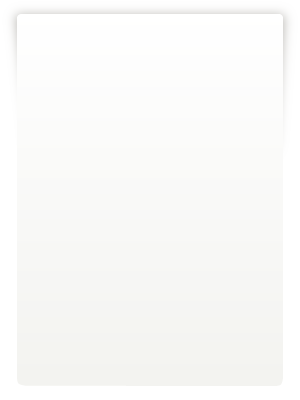
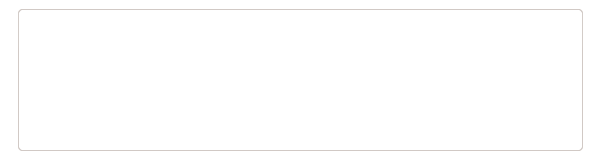
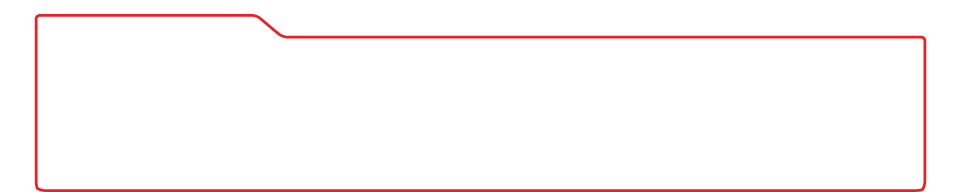
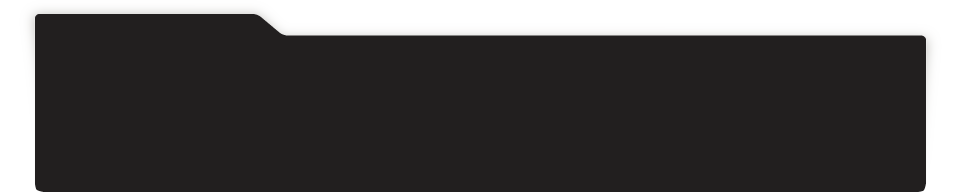
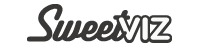
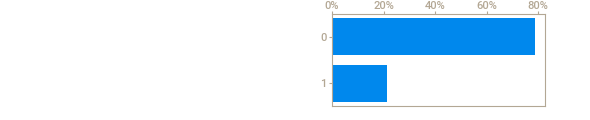
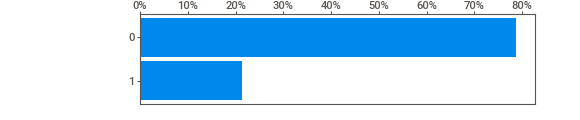
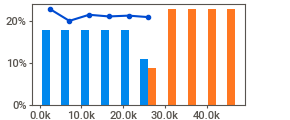
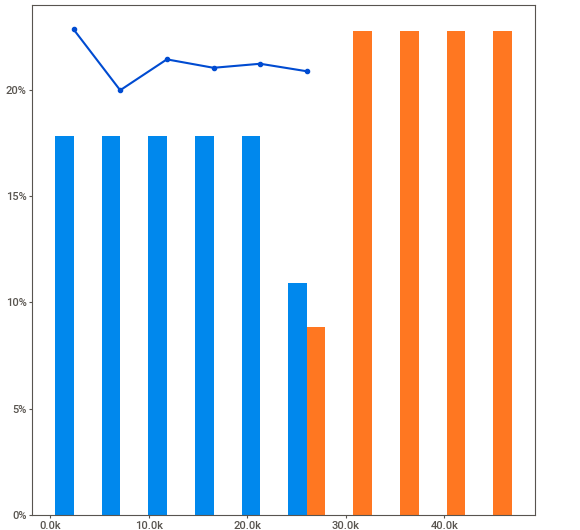
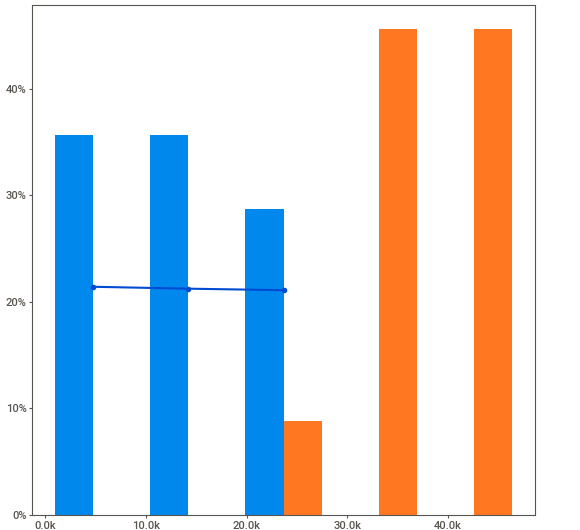
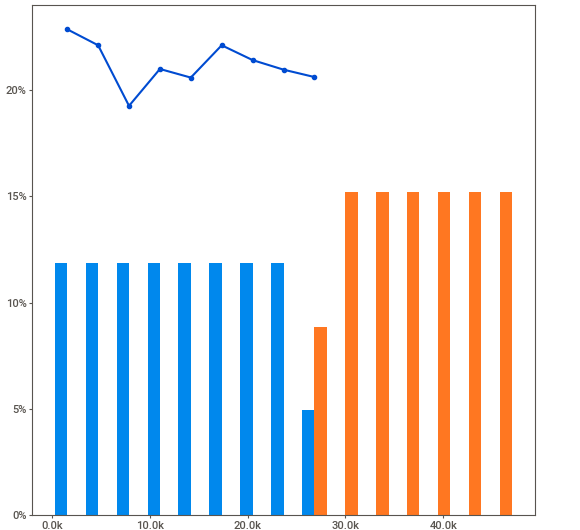
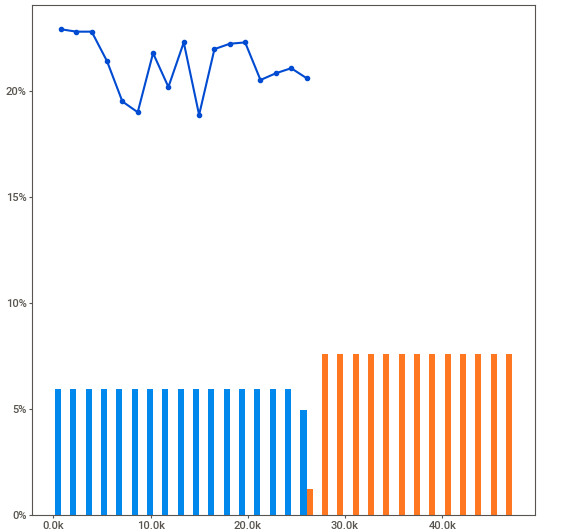
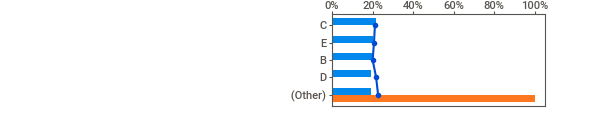
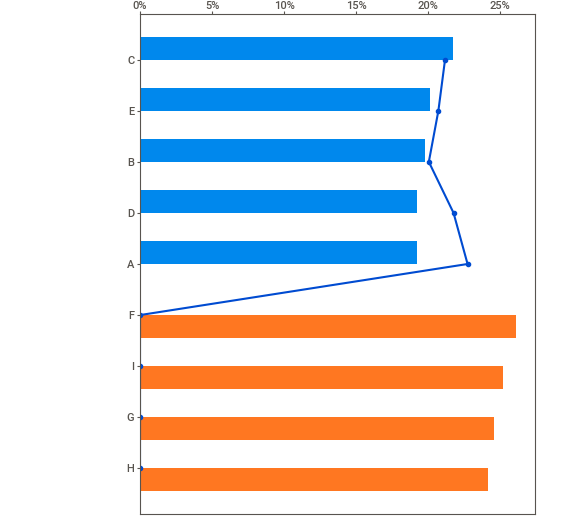
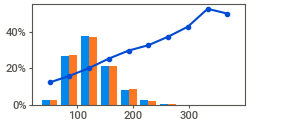
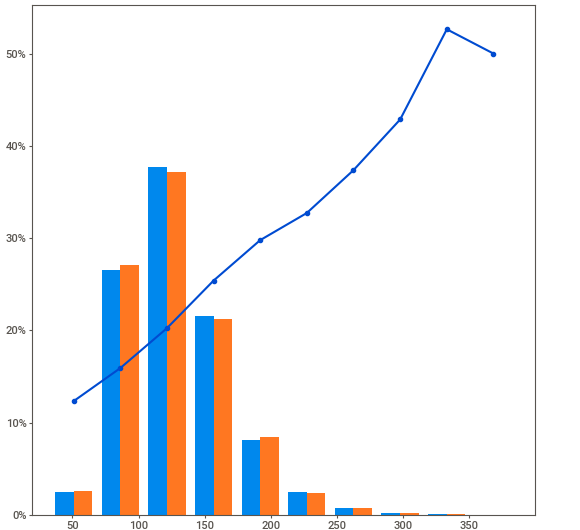
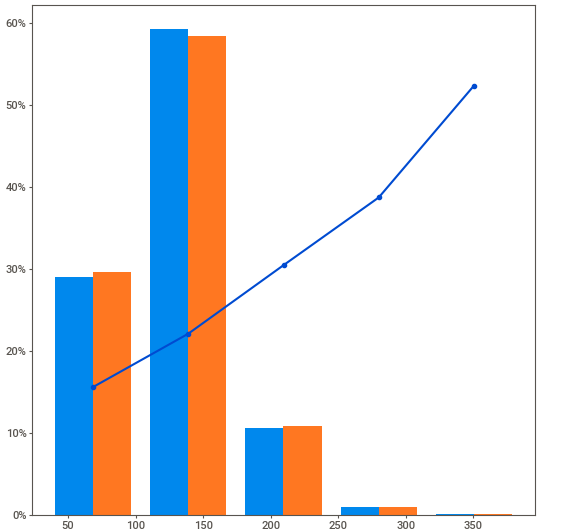
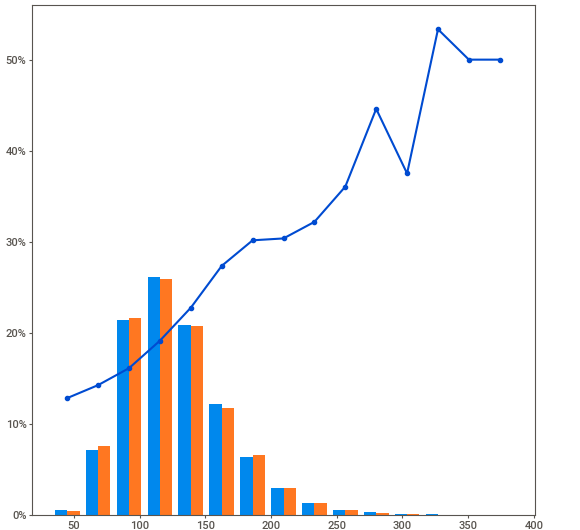
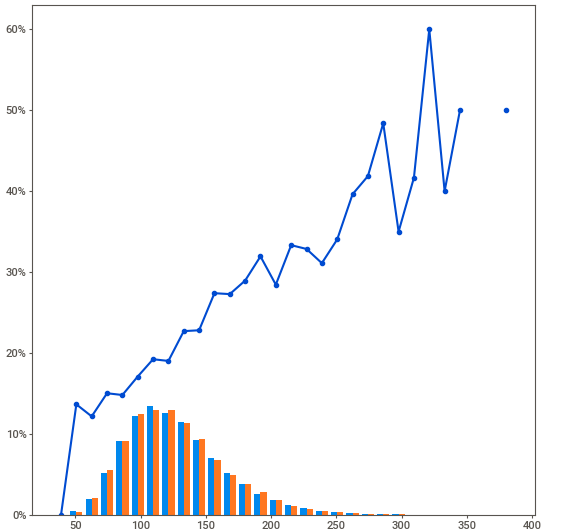
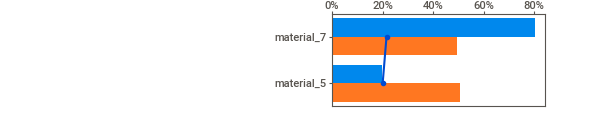
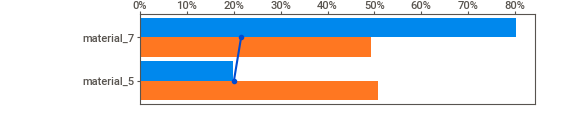
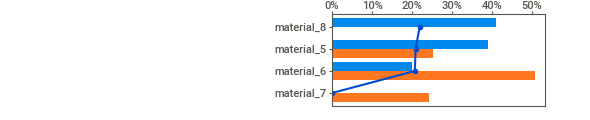
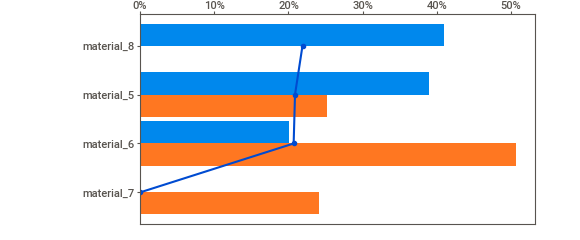
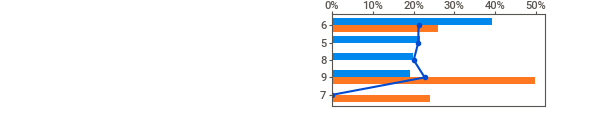
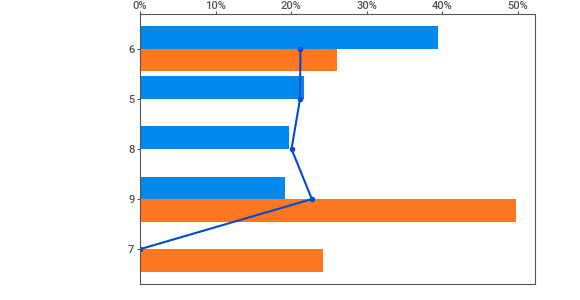
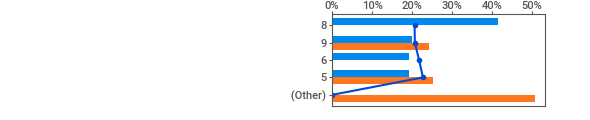
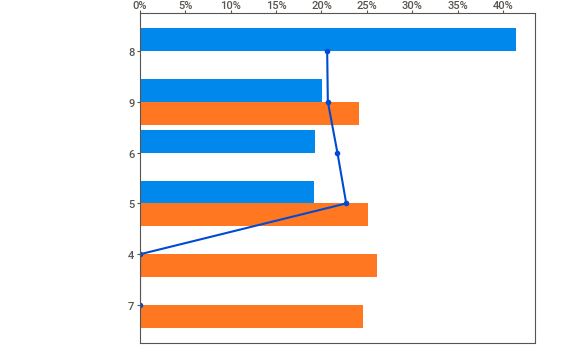
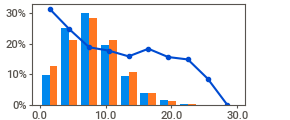
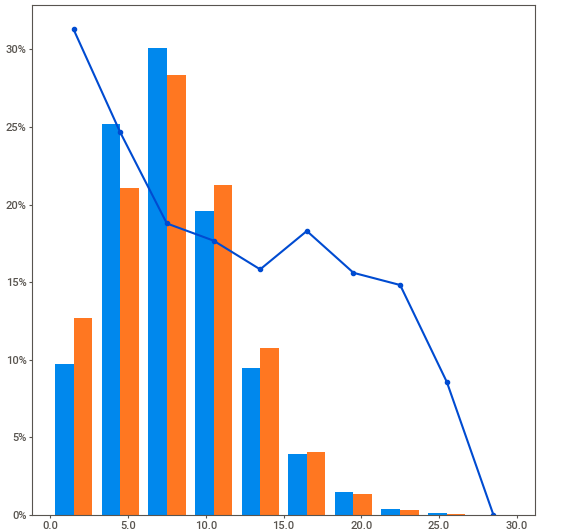
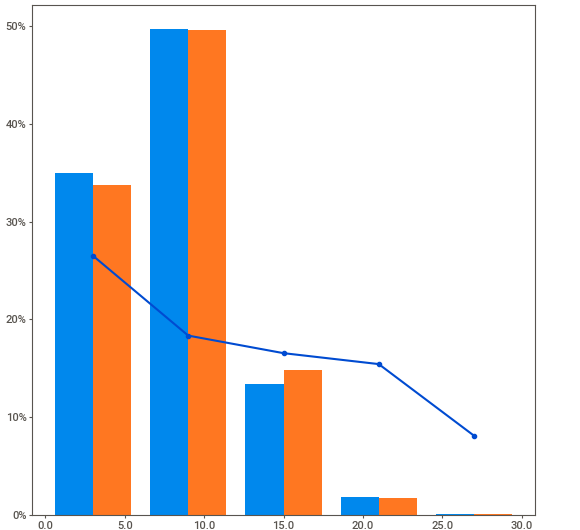
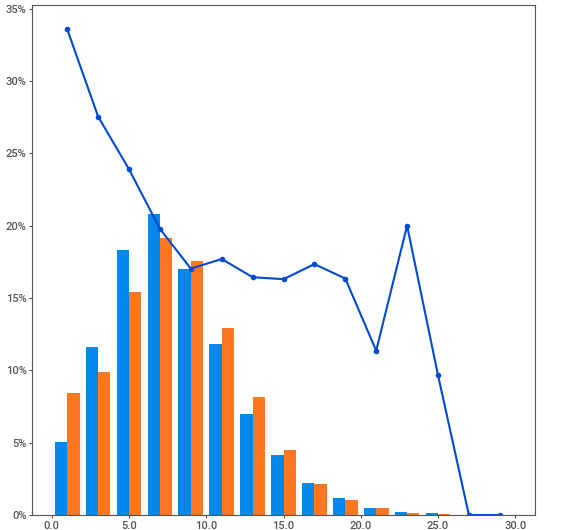
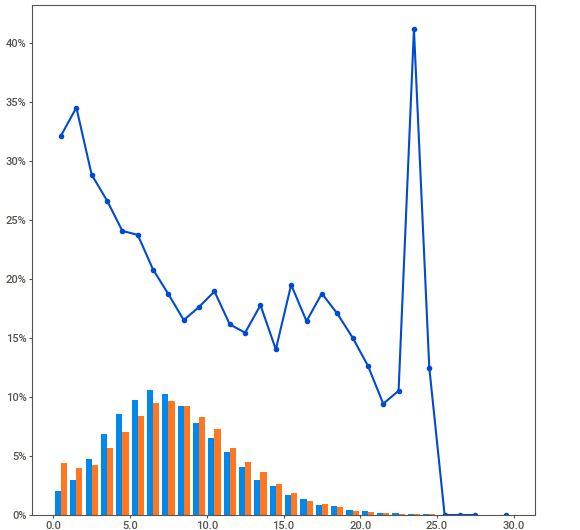
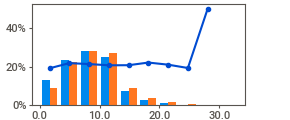
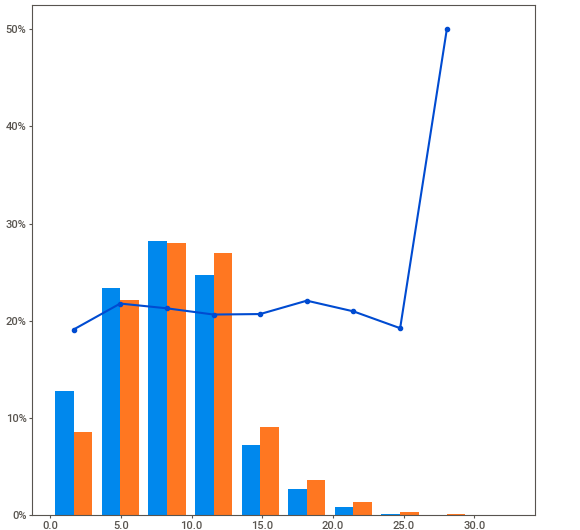
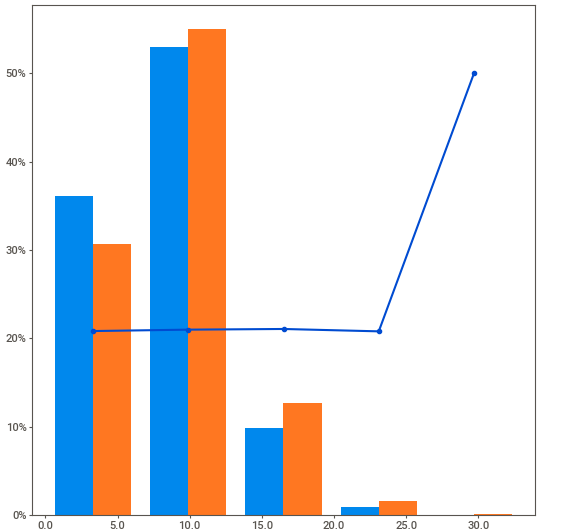
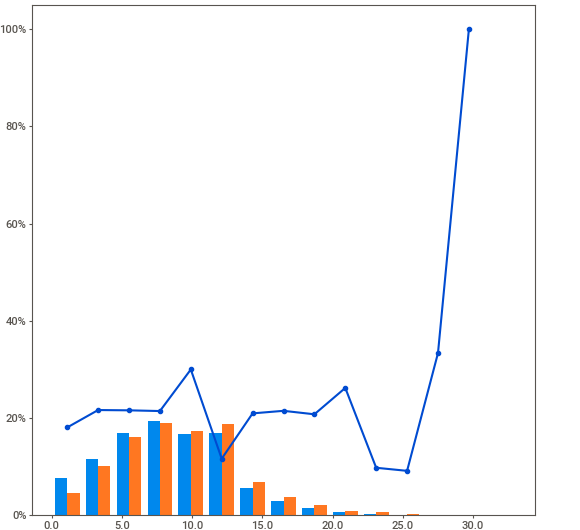
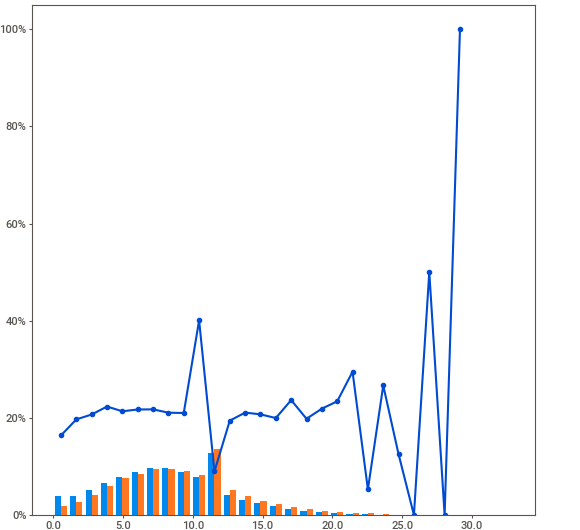
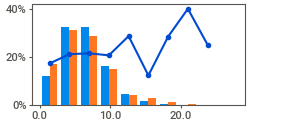
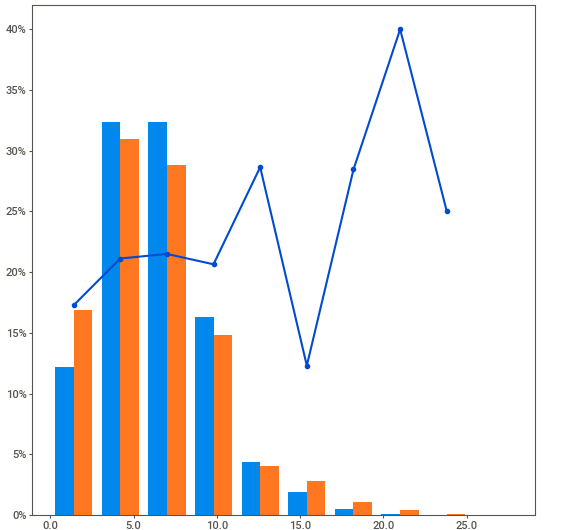
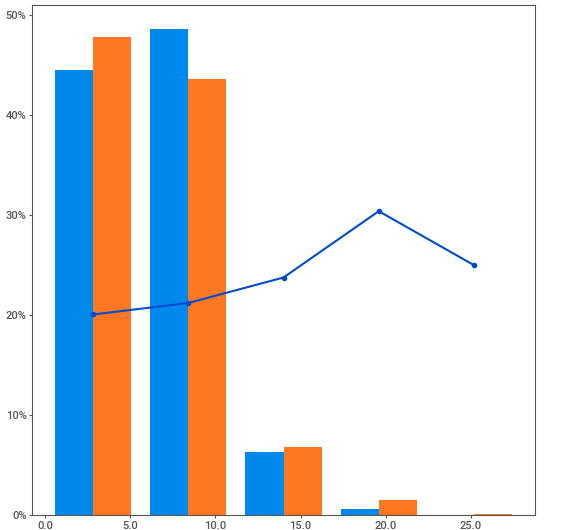
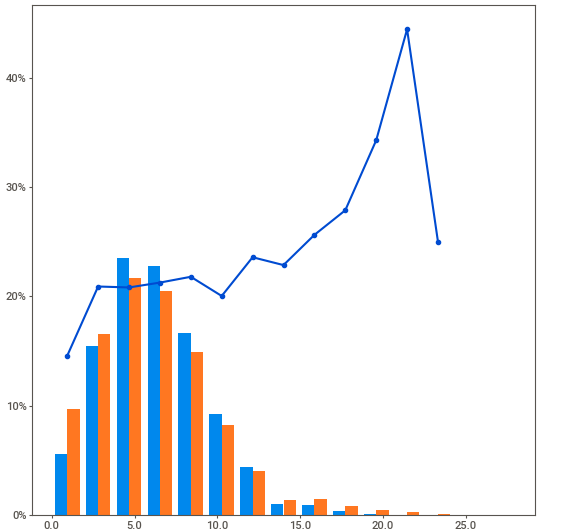
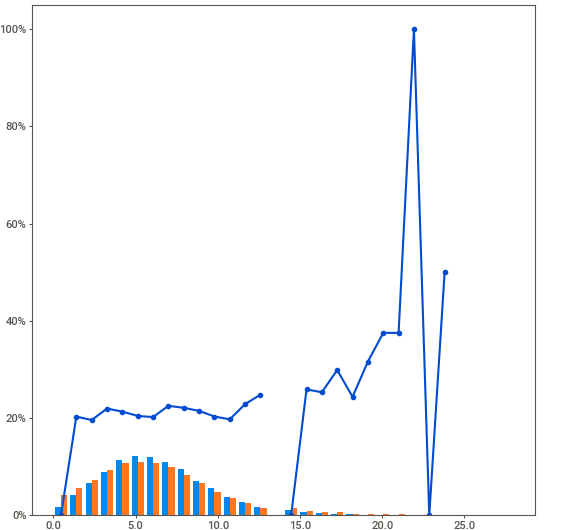
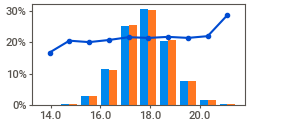
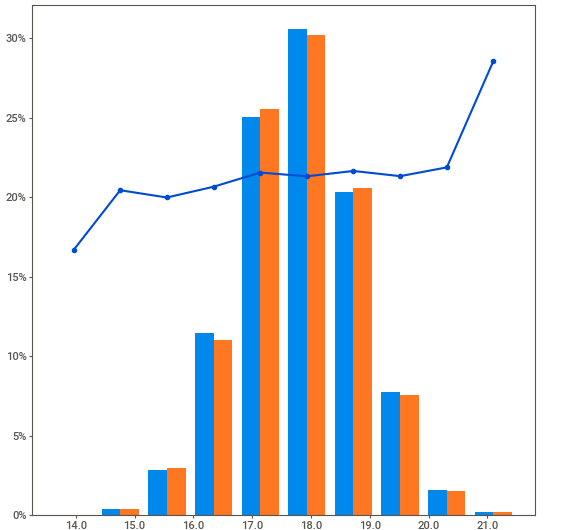
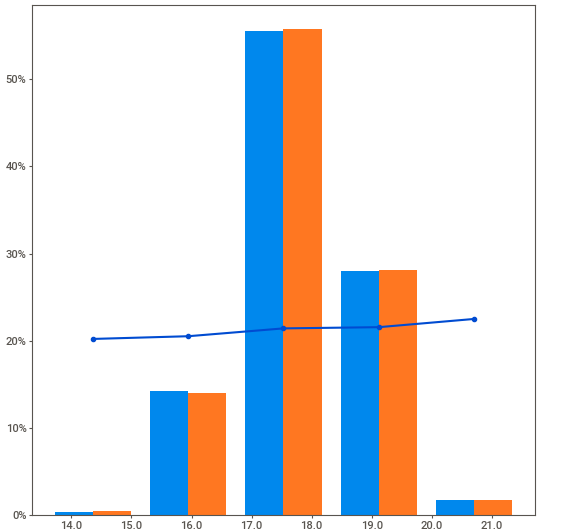
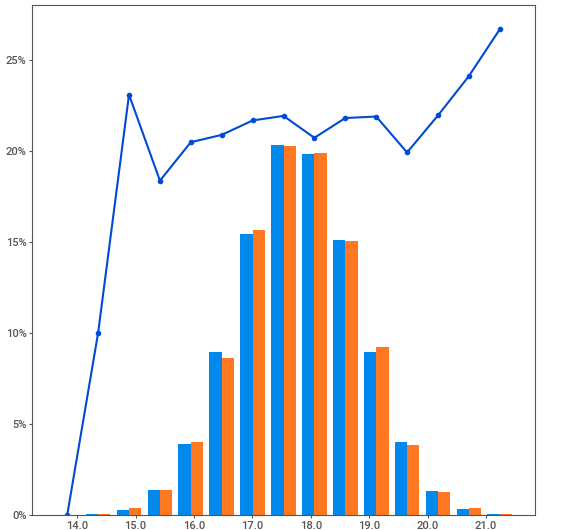
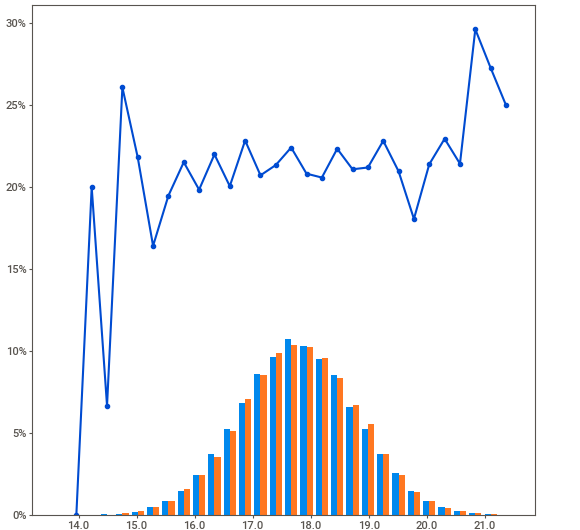
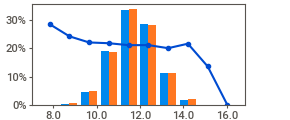
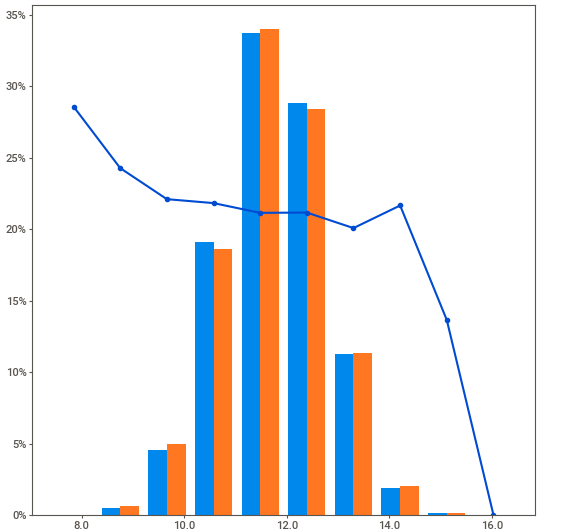
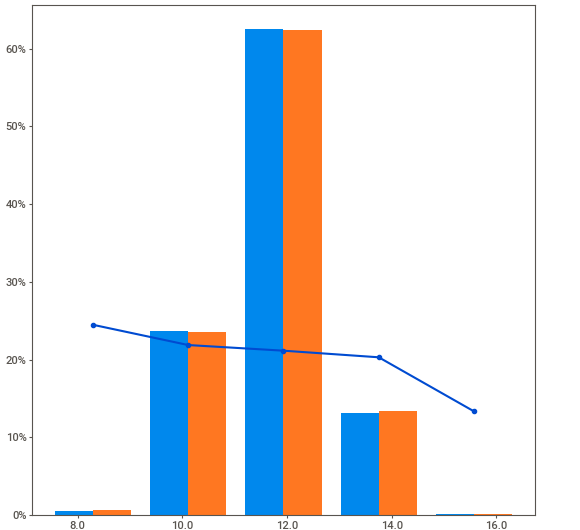
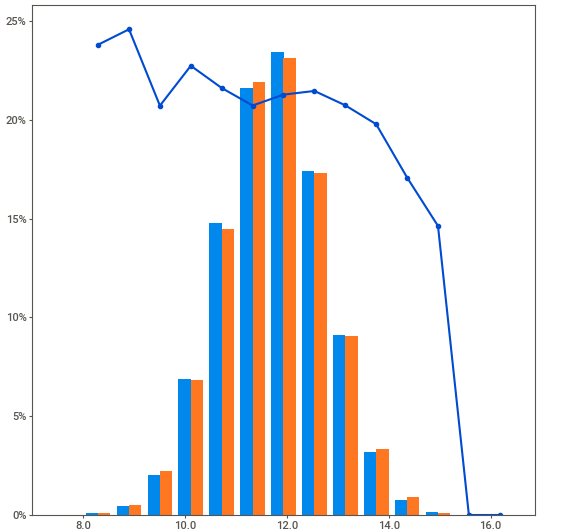
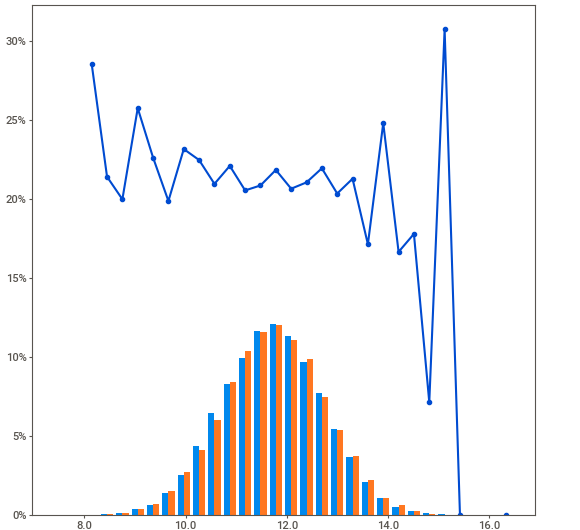
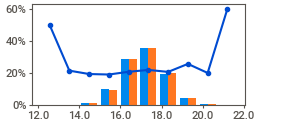
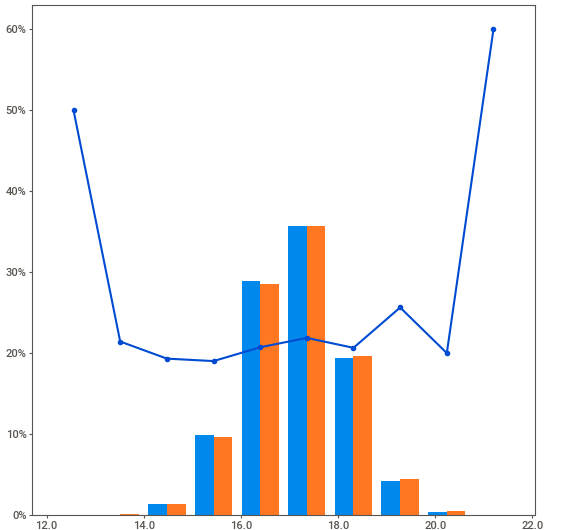
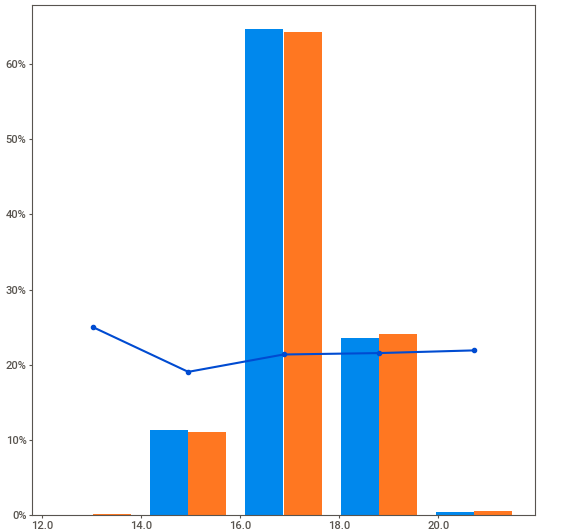
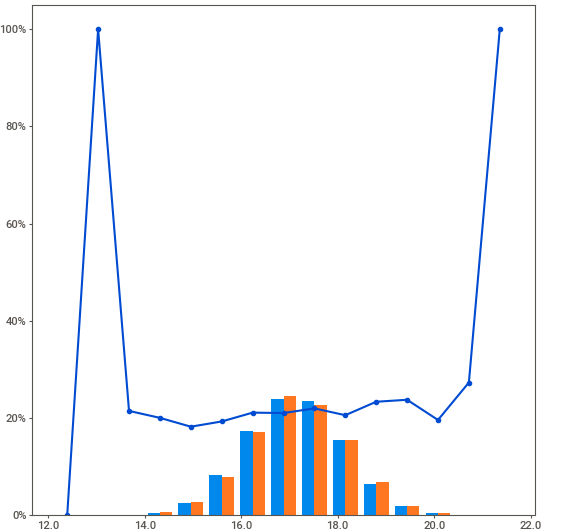
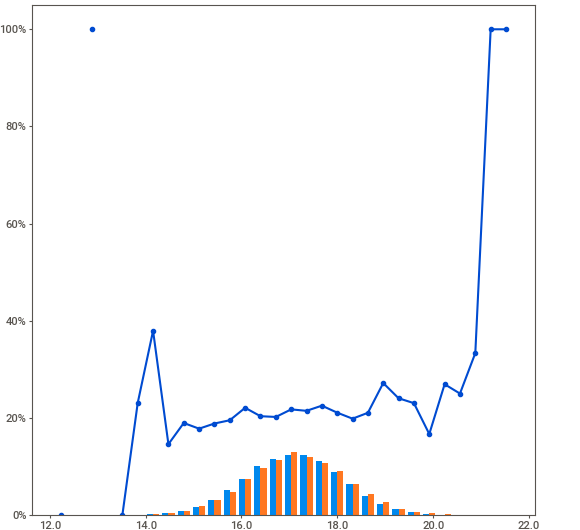
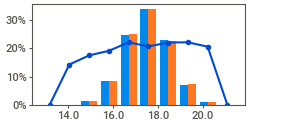
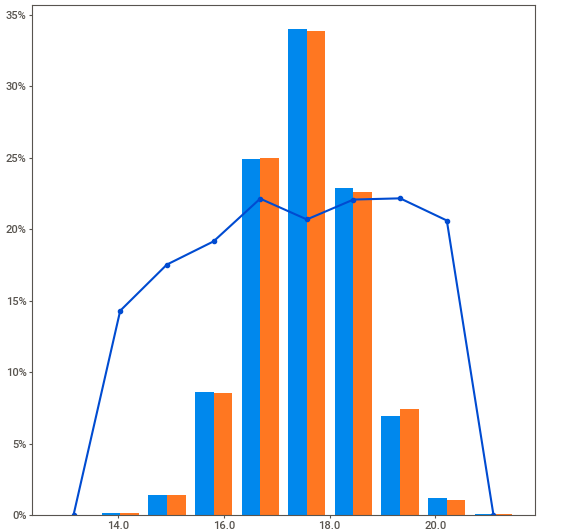
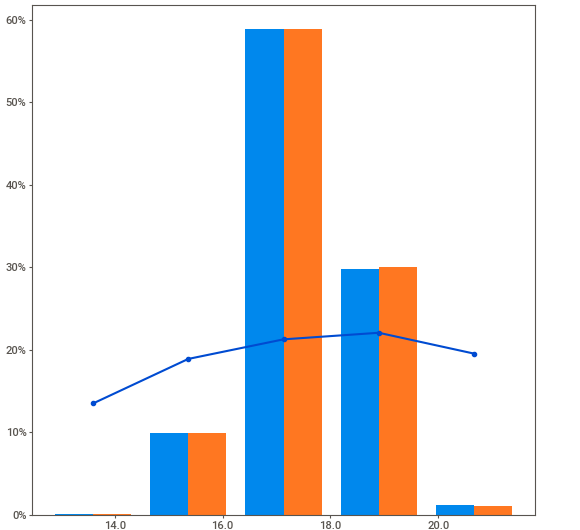
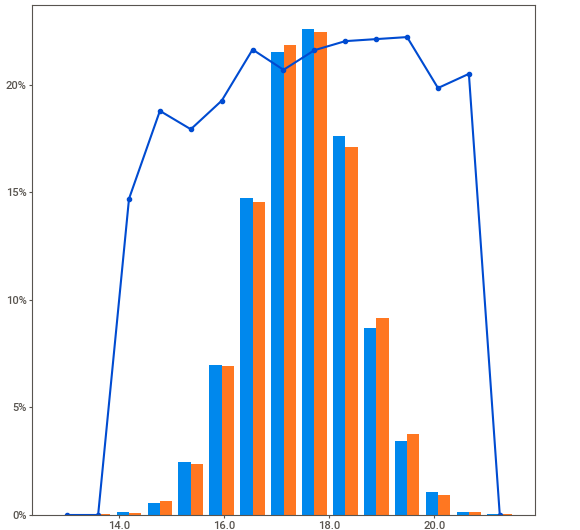
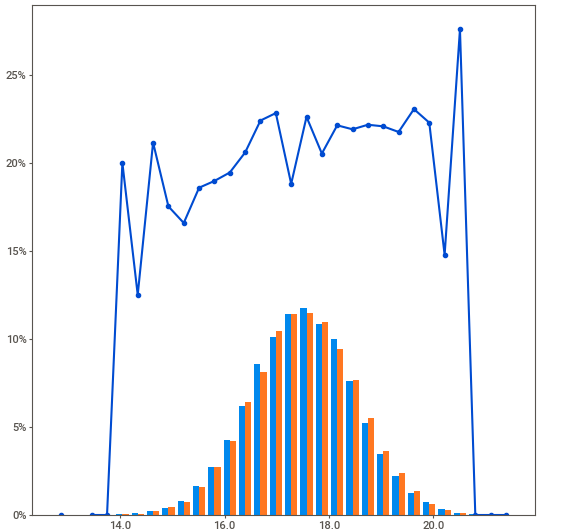
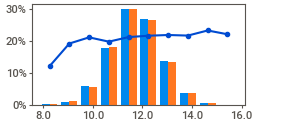
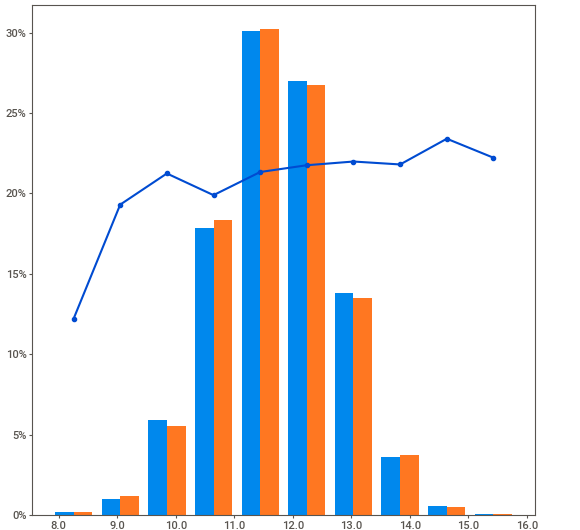
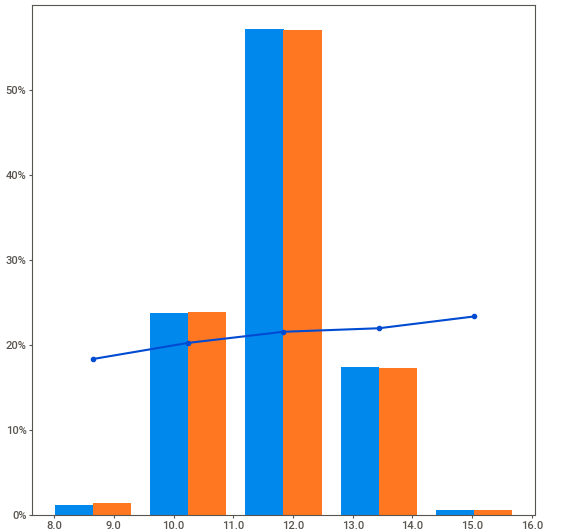
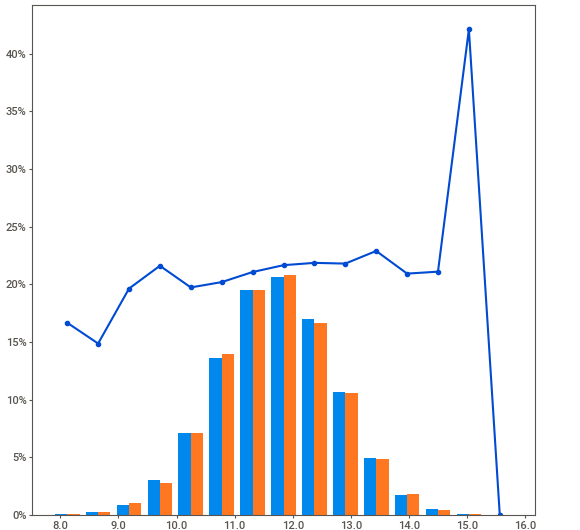
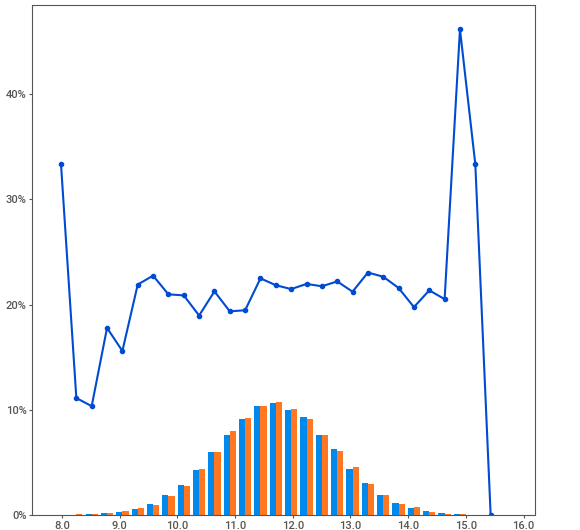
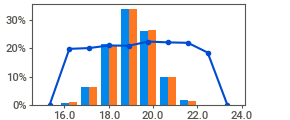
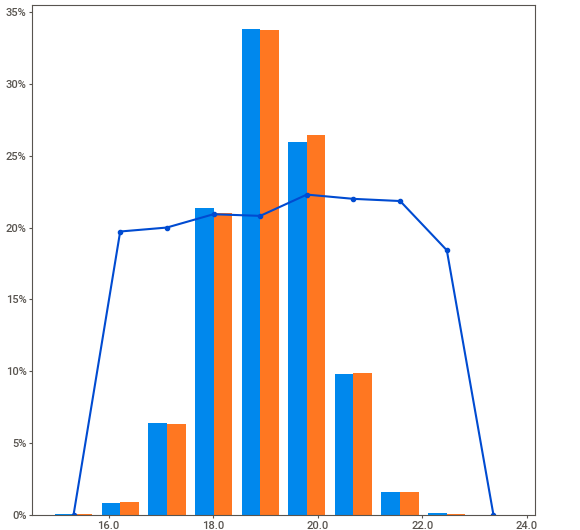
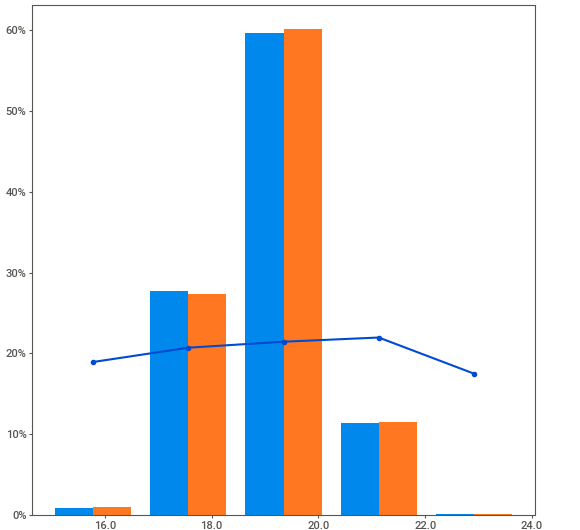
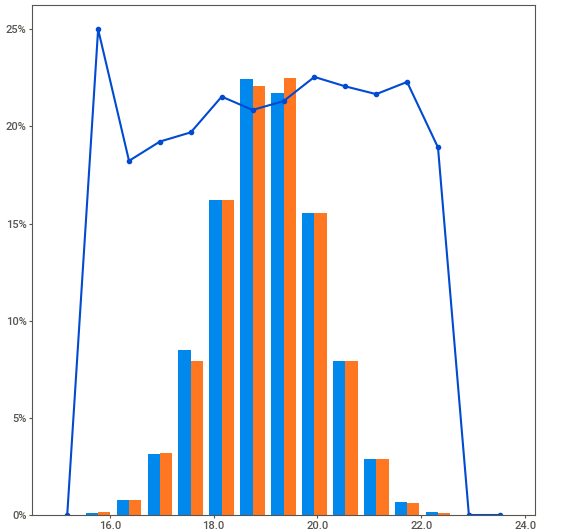
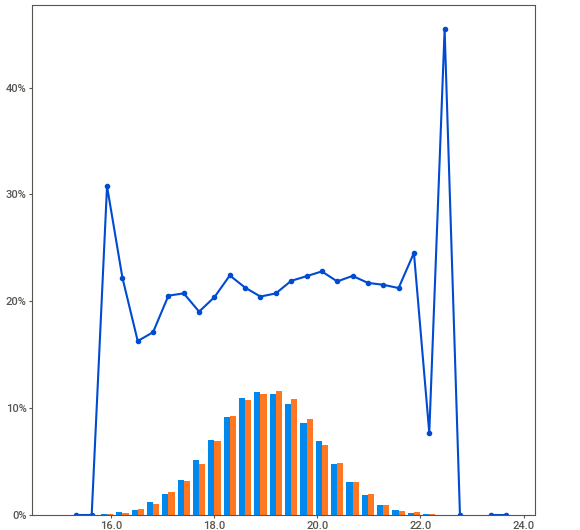
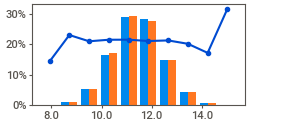
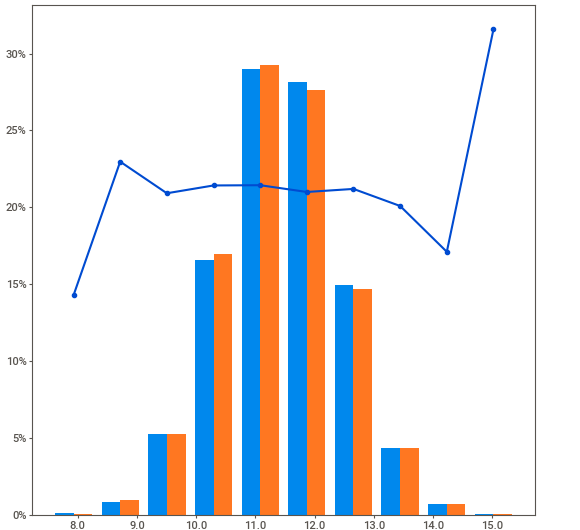
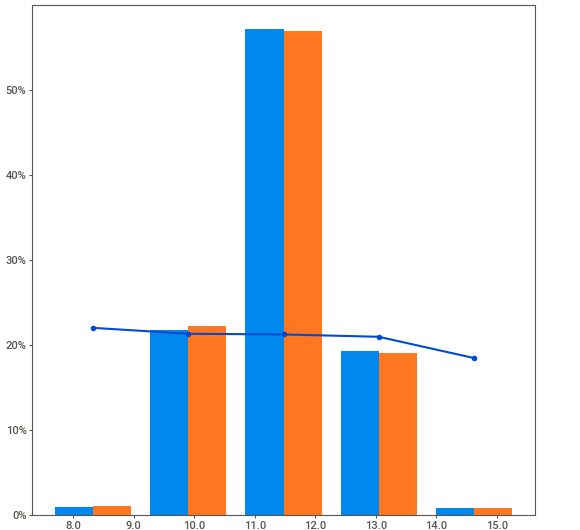
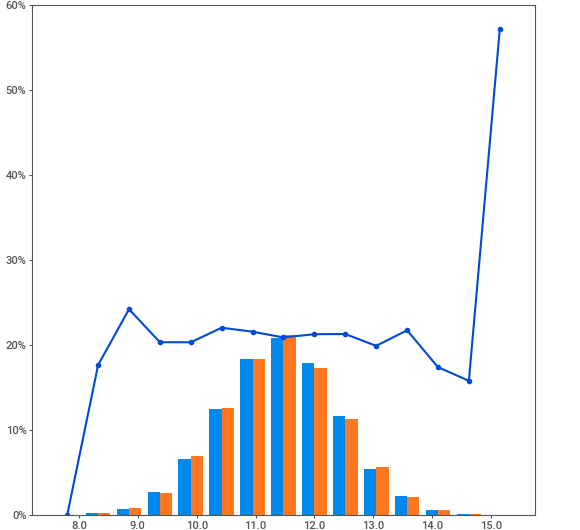
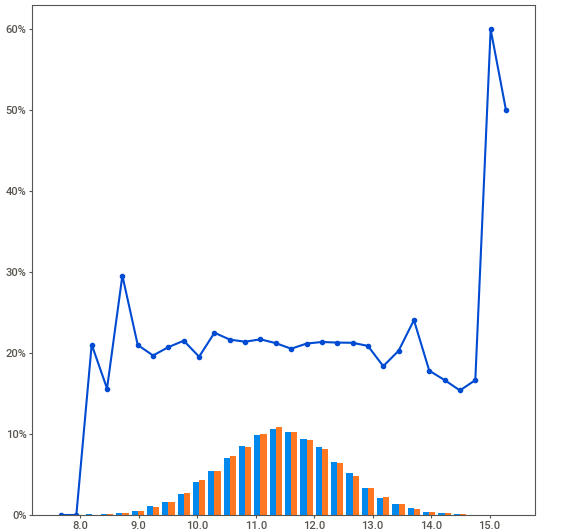
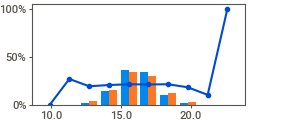
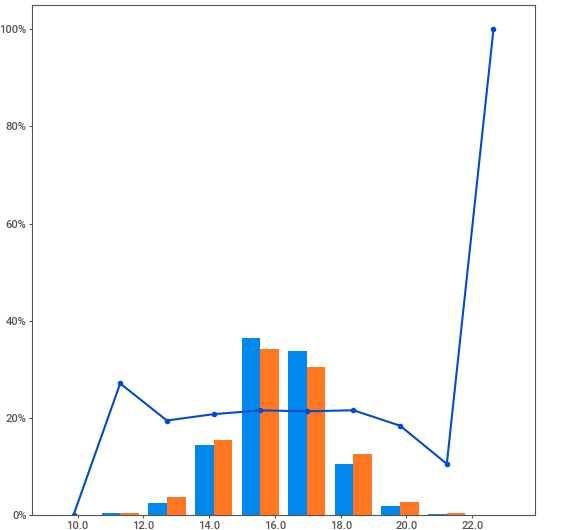
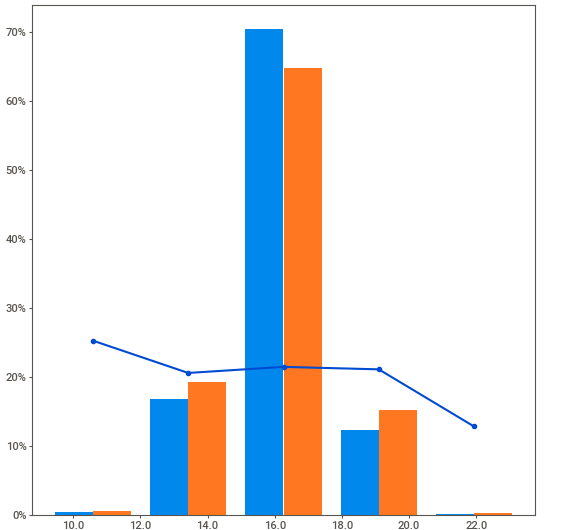
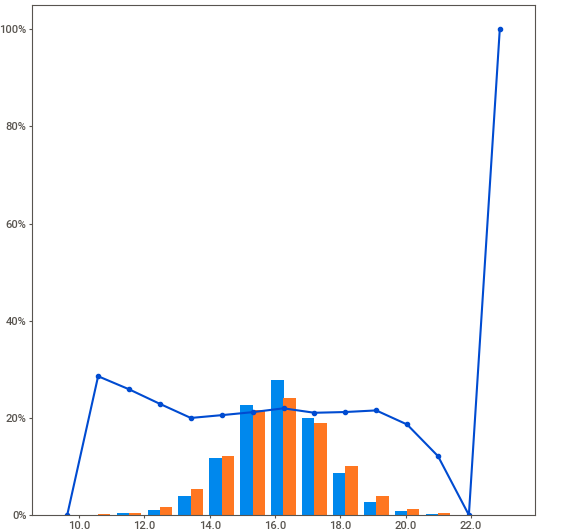
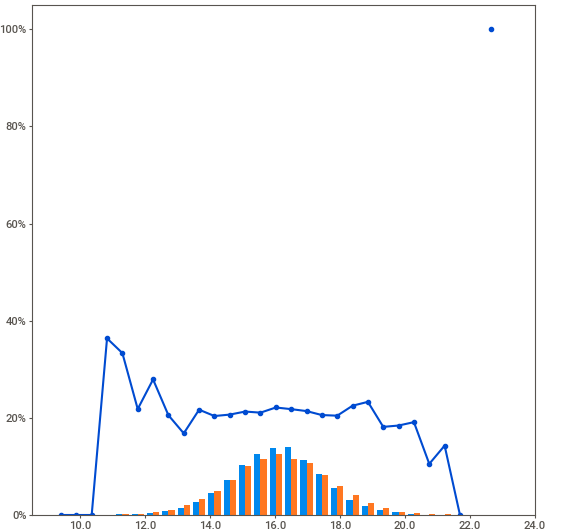
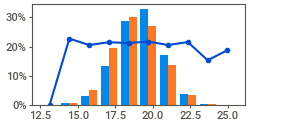
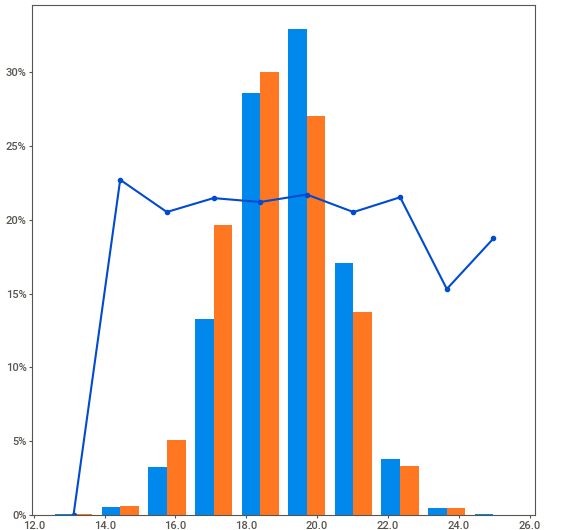
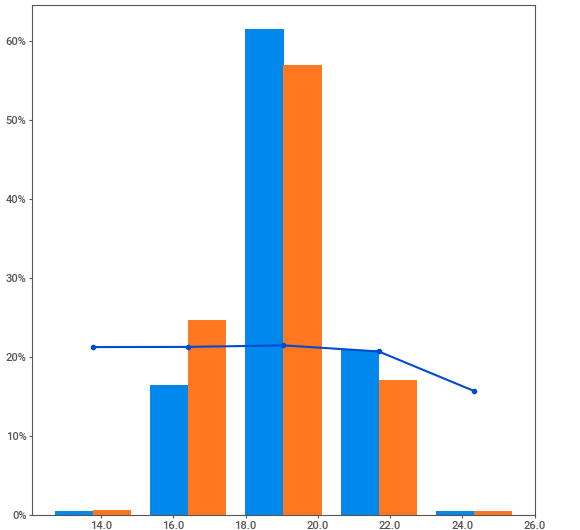
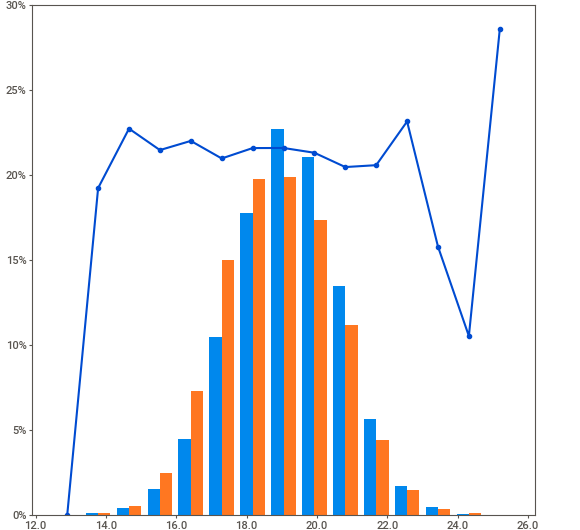
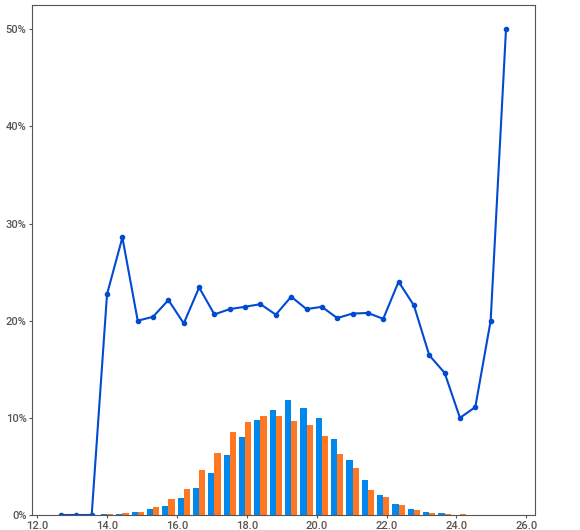
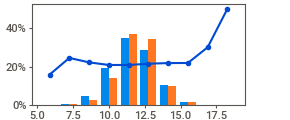
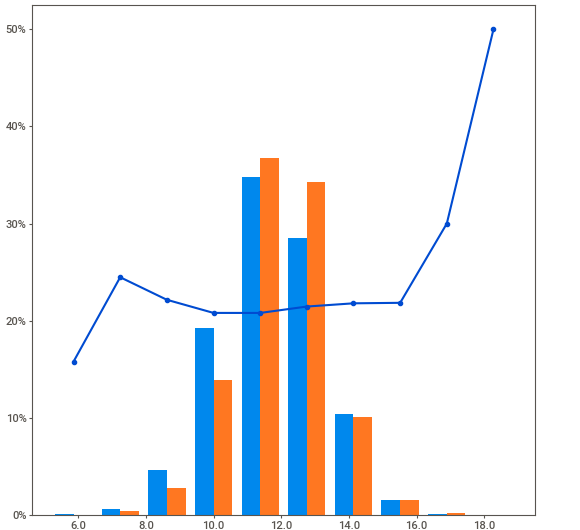
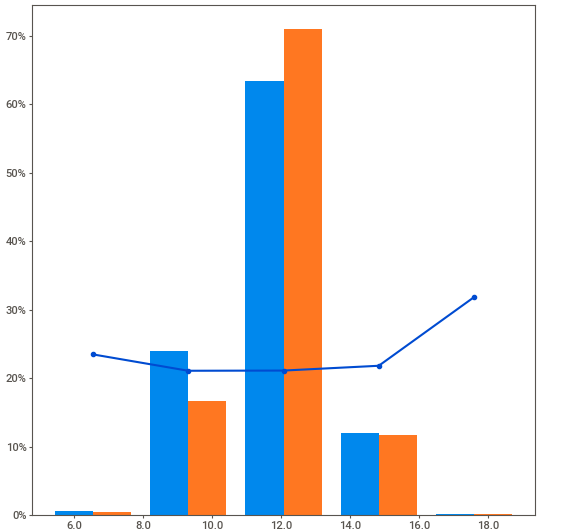
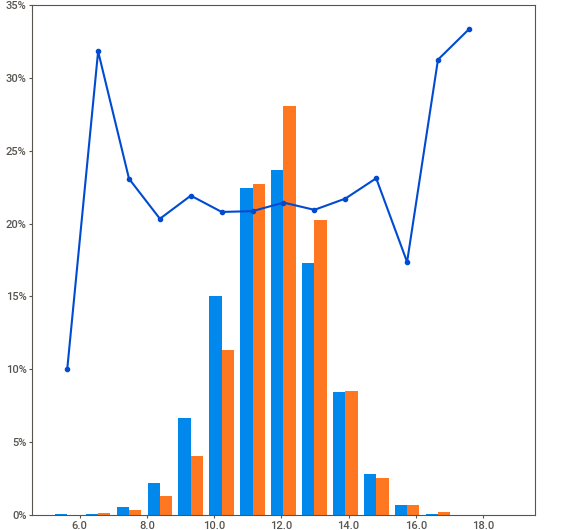
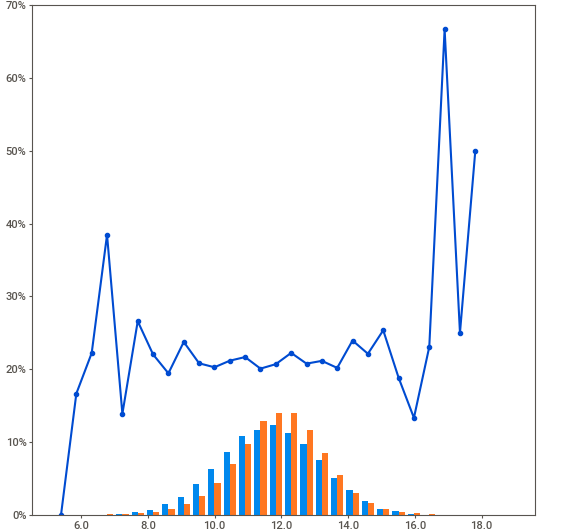
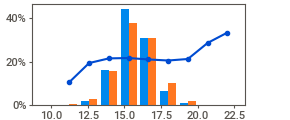
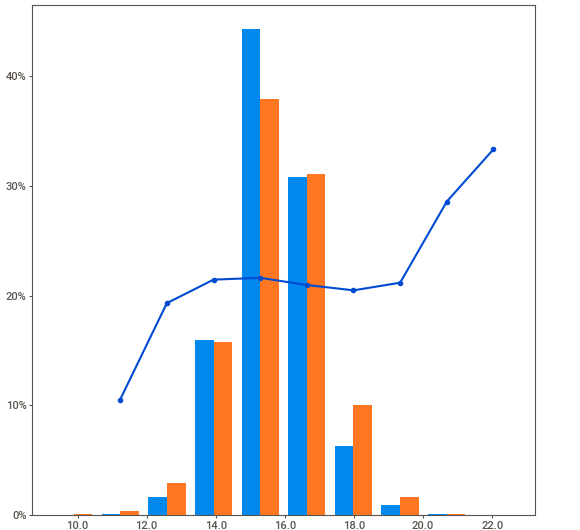
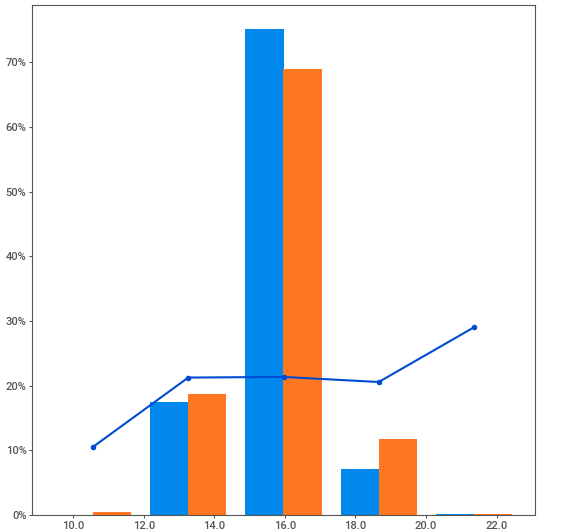
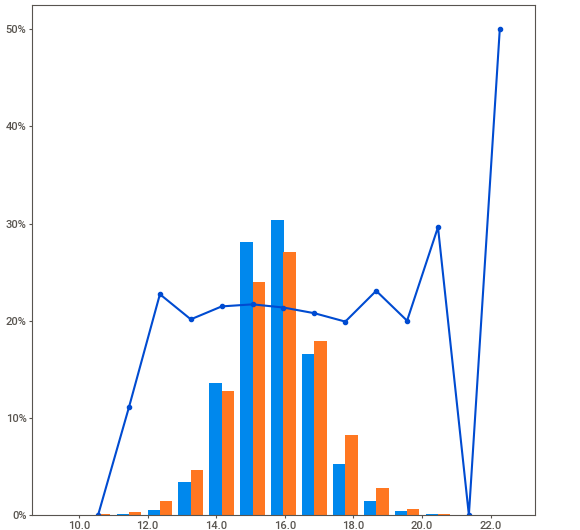
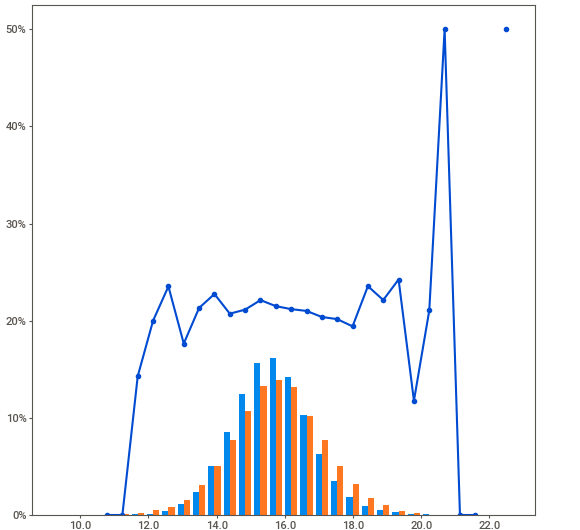
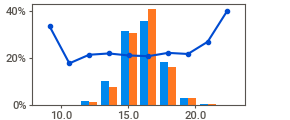
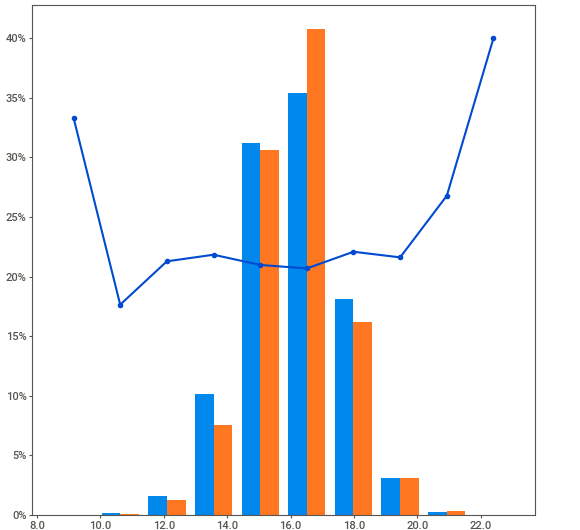
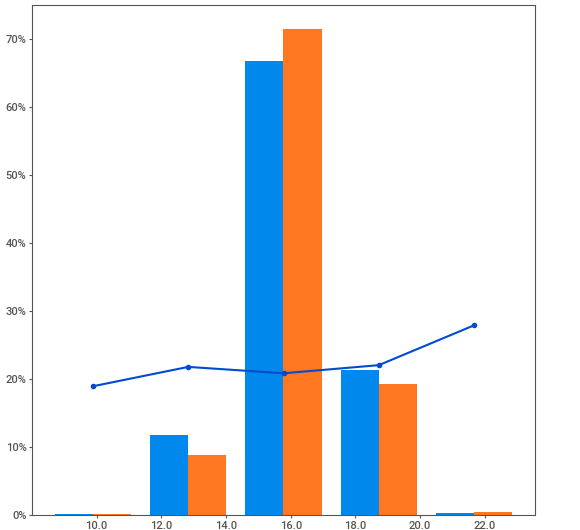
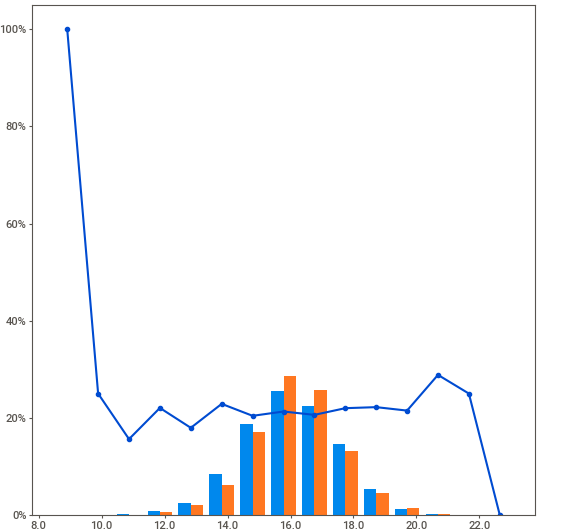
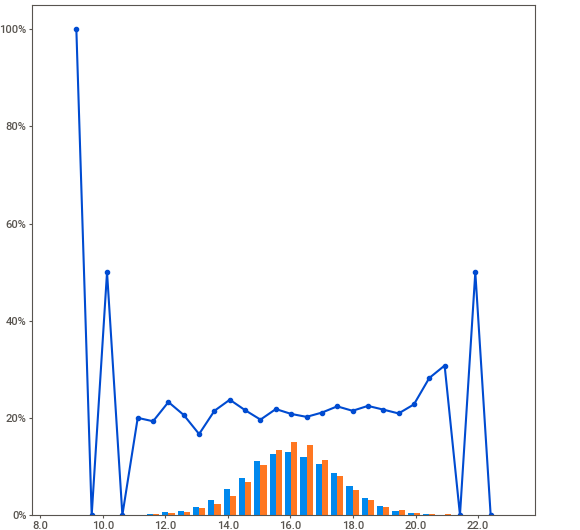
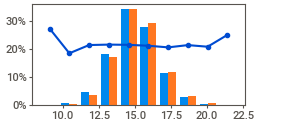
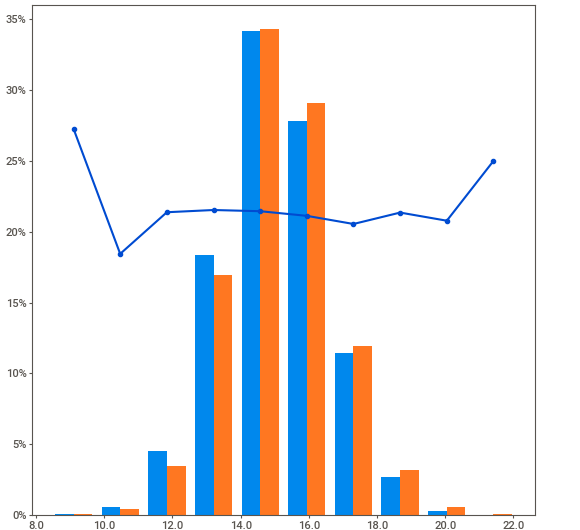
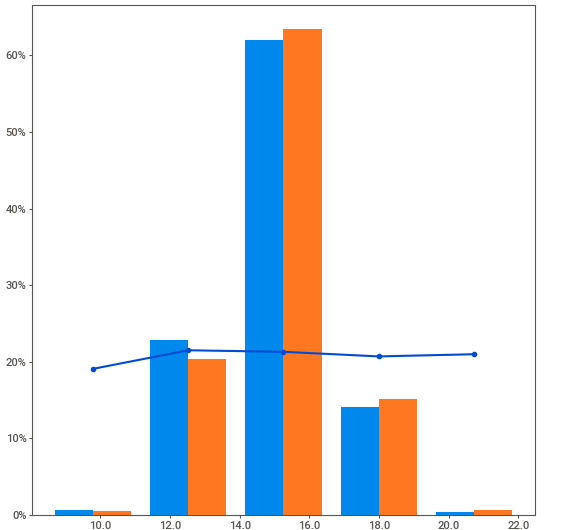
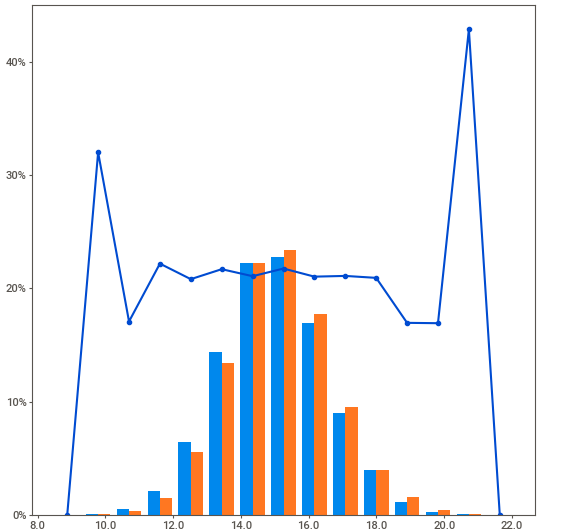
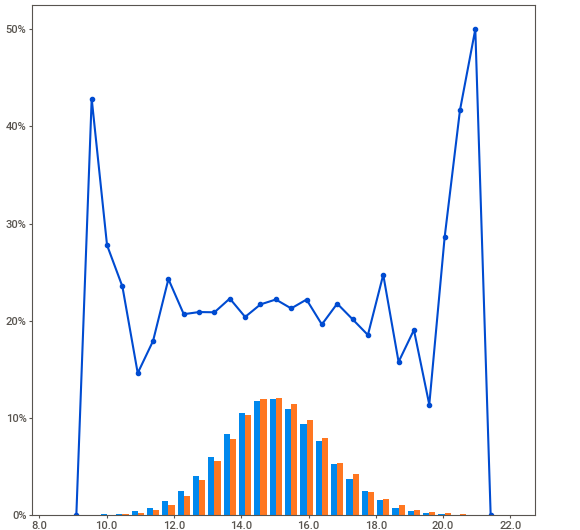
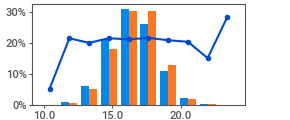
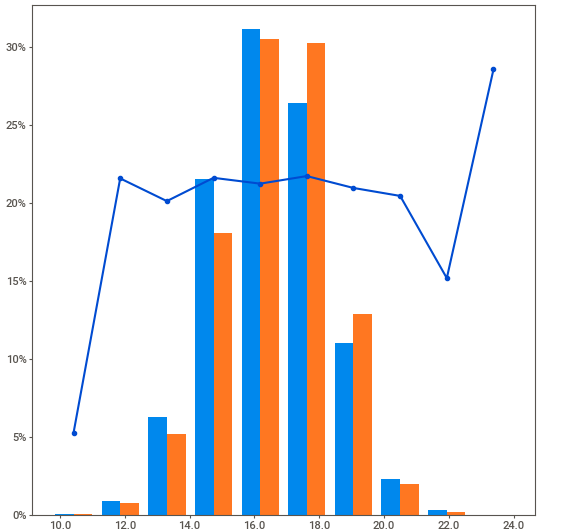
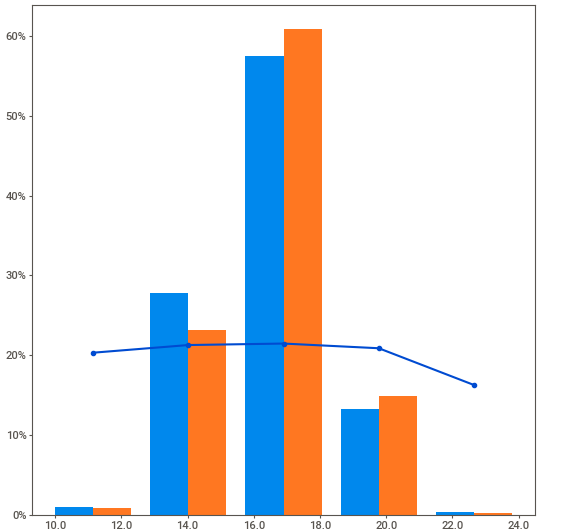
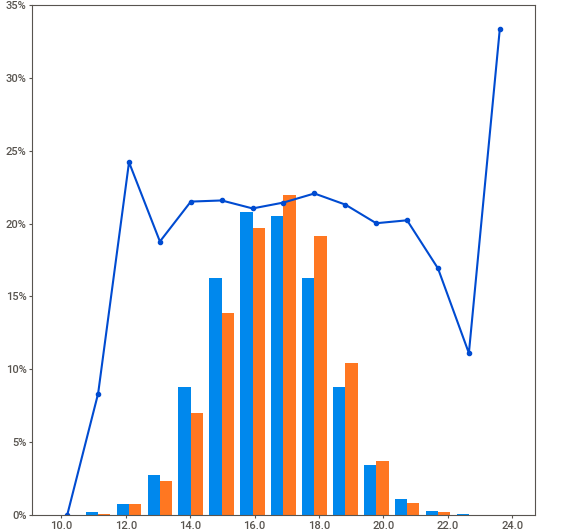
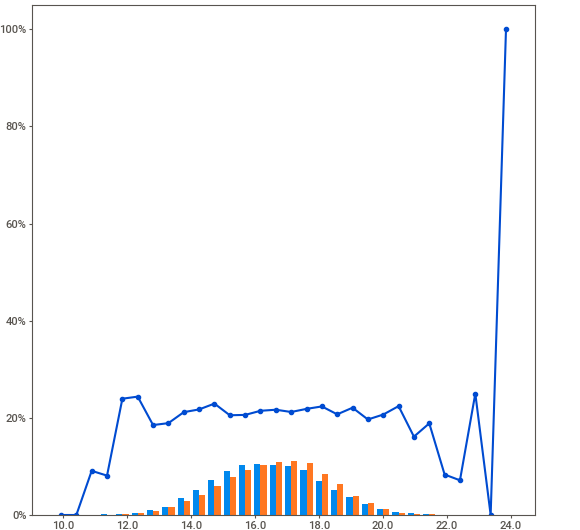
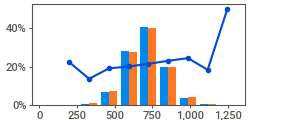
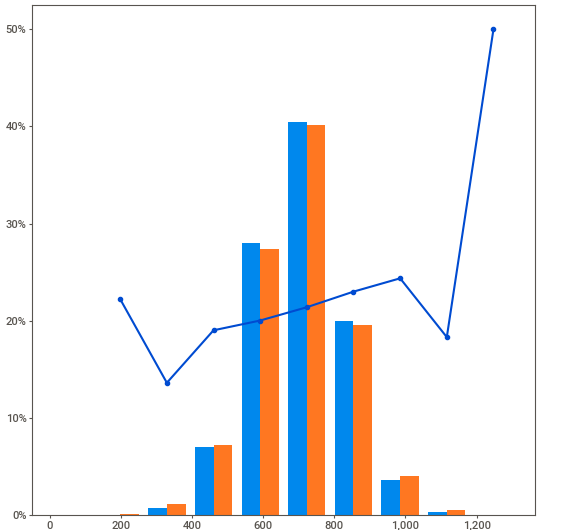
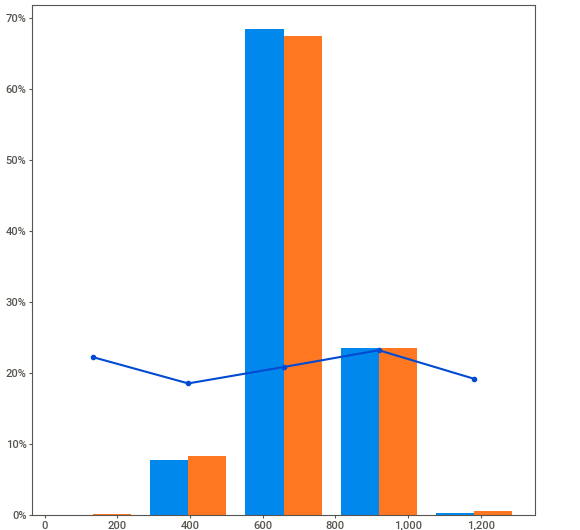
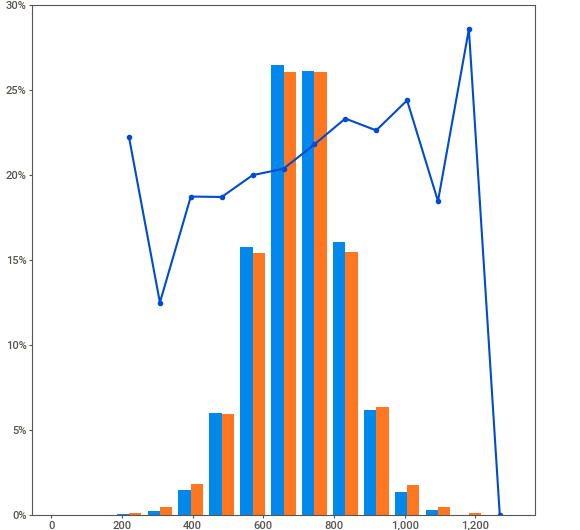
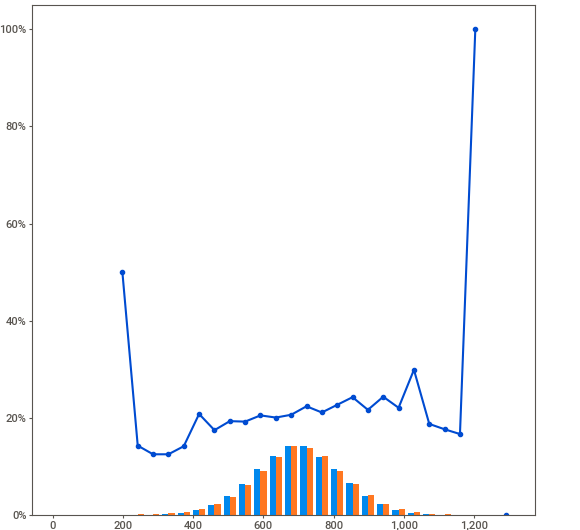
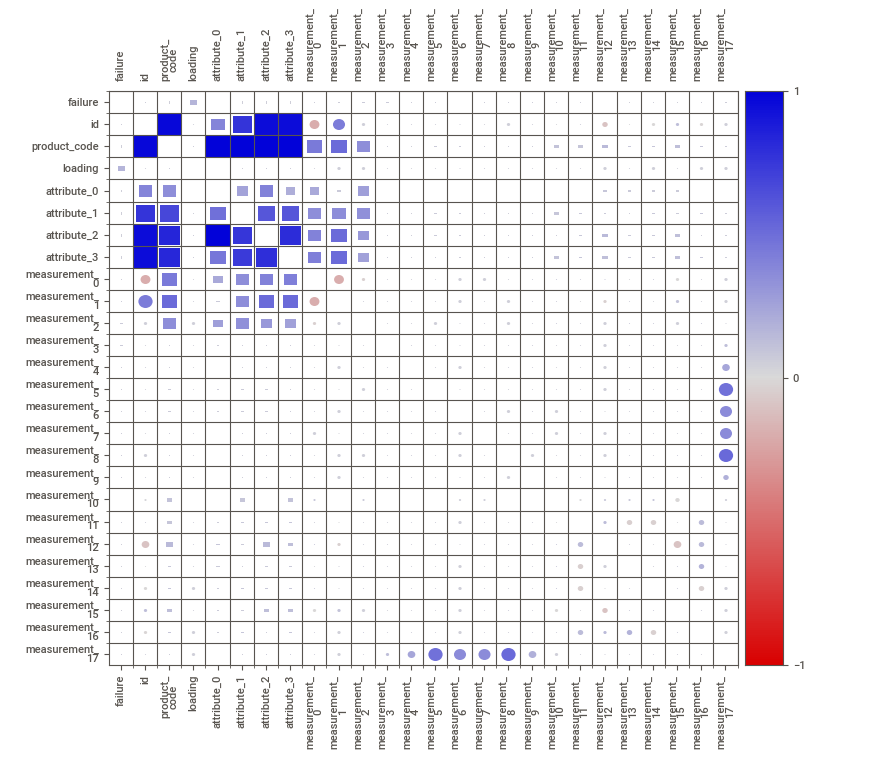
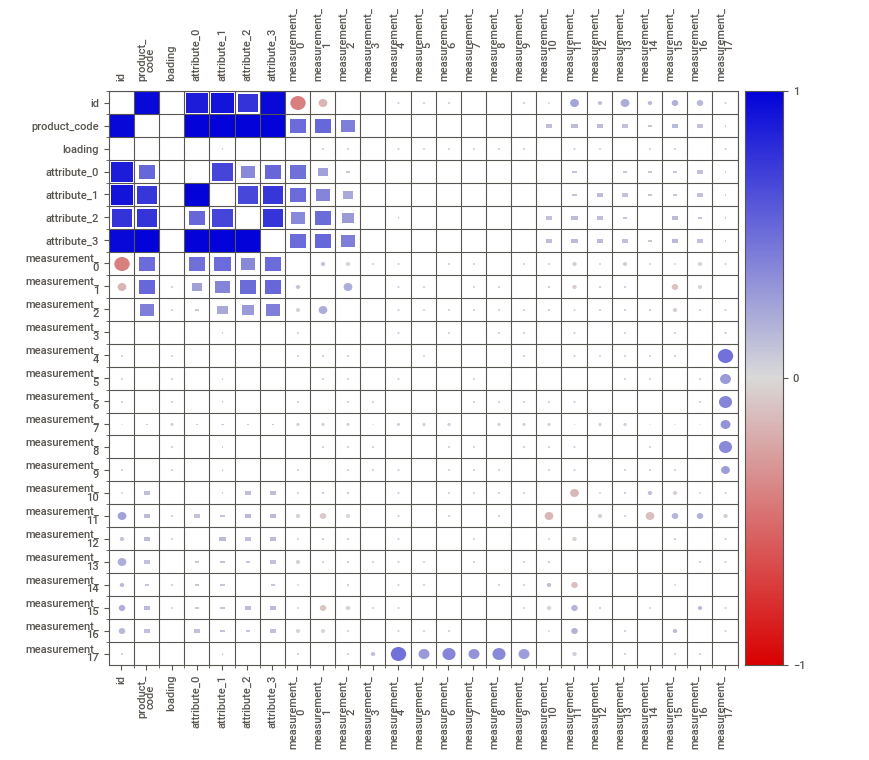

In [6]:
comparison_report = sv.compare(data, test, target_feat='failure')

comparison_report.show_notebook()

In fact, it seems quite different. categories within the categorical variables are quite different. Some levels are absent in test set. Other levels appear only in test set. Correlations are quite similar between train and test set. However, correlation between measurement 0 and 1 is lost in test set. 